## [Emisiones procedentes de la ganaderia](https://www.ipcc-nggip.iges.or.jp/public/2006gl/spanish/pdf/4_Volume4/V4_10_Ch10_Livestock.pdf)
#### *Las emisiones de la ganaderia provienen de dos fuentes:*
   ##### [1- Fermentación entérica](http://www.fao.org/faostat/es/#data/GE): 
   El metano se produce en los herbívoros como subproducto de la fermentación entérica, un proceso digestivo por el
cual los micro-organismos descomponen los carbohidratos en moléculas simples para la absorción en el flujo
sanguíneo. La cantidad de metano que se libera depende del tipo de tracto digestivo, la edad y el peso del animal, así
como de la calidad y la cantidad del alimento consumido. Los rumiantes (p. ej., vacunos, ovinos) son fuentes
importantes de metano con cantidades moderadas producidas por no rumiantes (p. ej., porcinos, equinos). La
estructura intestinal de los rumiantes favorece una importante fermentación entérica de su dieta.
   ##### [2- Gestión del estiercol](http://www.fao.org/faostat/es/#data/GM):
  El término estiércol se utiliza de modo que incluye la bosta y la orina (es decir, los sólidos y los líquidos) producidos por el ganado. La descomposición del estiércol bajo condiciones anaeróbicas durante su almacenamiento y tratamiento, produce CH4. Estas condiciones se dan más fácilmente cuando se gestionan grandes cantidades de animales en una superficie confinada (p. ej., tambos, corrales de ganado de carne, y granjas de ovinos y de aves de corral), y donde se elimina el estiércol en sistemas basados en líquidos. Se declaran las emisiones de CH4 relacionadas con el manejo y el almacenamiento de estiércol bajo esta categoria.
  
  
  El sector ganadero emite principalmente dos tipos de gases: Metano (CH4) y Oxido nitroso (N2O). Sin embargo, a modo de equiparar datos, las emisiones estan en base a Dióxido de carbono equivalente (CO2_eq): 1CH4 = 25CO2, 1NO2 = 298CO2
  
## [Emisiones procedentes de cultivos](https://www.ipcc-nggip.iges.or.jp/public/2006gl/spanish/pdf/4_Volume4/V4_05_Ch5_Cropland.pdf)

Debido a la falta de datos de emisión de gases de efecto invernadero diferenciados por cultivos, he estimado la emisión de los cultivos objetivo de este estudio. Los datos fueron calculados utilizando las directrices del Intergovernmental Panel on Climate Change [(IPCC 2006).](https://www.ipcc-nggip.iges.or.jp/public/2006gl/spanish/vol4.html)

La metodología utilizada en el cálculo de las emisiones se encuentra resumida en el paper (Ref 1).

He seleccionado cuatro cultivos utilizados para la producción de alimentos sustitutos de carne vacuna [Ref 2](https://link.springer.com/article/10.1007/s11367-015-0931-6): Soja, Trigo, Maiz, Guisantes. Dos cultivos pertenecientes a la familia de las leguminosas y los otros dos a la familia de las poaceas. 

El sector tierras emite unicamente CO2.

# 1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

C:\Users\Paola\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 2 - Import data

### 2A -  Livestock

In [2]:
data_enteric = pd.read_csv ('FAOSTAT_data_enteric1960.csv',parse_dates=['Año'])
data_manure = pd.read_csv ('FAOSTAT_data_manure1960.csv', parse_dates=['Año'])

In [3]:
data_enteric.head()

,Ámbito,Área,Elemento,Producto,Año,Unidad,Valor
0,Fermentación entérica,Paraguay,Emisiones (CO2eq) (Entérica),"Vacunos, otros",1961-01-01,gigagramos,5472.4125
1,Fermentación entérica,Paraguay,Emisiones (CO2eq) (Entérica),"Vacunos, otros",1962-01-01,gigagramos,5241.5084
2,Fermentación entérica,Paraguay,Emisiones (CO2eq) (Entérica),"Vacunos, otros",1963-01-01,gigagramos,5006.2320
3,Fermentación entérica,Paraguay,Emisiones (CO2eq) (Entérica),"Vacunos, otros",1964-01-01,gigagramos,5063.8560
4,Fermentación entérica,Paraguay,Emisiones (CO2eq) (Entérica),"Vacunos, otros",1965-01-01,gigagramos,5121.4800


In [4]:
data_enteric.shape

(57, 7)

In [5]:
data_enteric.describe()

,Valor
count,57.000000
mean,9327.092360
std,3544.679467
min,5002.704000
25%,5856.832800
50%,9025.280200
75%,11373.130100
max,16746.923300


In [6]:
data_manure.head()

,Ámbito,Área,Elemento,Producto,Año,Unidad,Valor
0,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1961-01-01,gigagramos,97.7217
1,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1962-01-01,gigagramos,93.5984
2,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1963-01-01,gigagramos,89.3970
3,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1964-01-01,gigagramos,90.4260
4,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1965-01-01,gigagramos,91.4550


In [7]:
data_manure.shape

(285, 7)

In [8]:
data_manure.describe()

,Valor
count,285.000000
mean,71.267368
std,90.833661
min,0.000000
25%,4.251200
50%,9.440500
75%,137.469300
max,312.953300


### 2B - Crops

In [9]:
data_soy = pd.read_excel('soy_emissions1961.xlsx', parse_dates= ['Year'])
data_corn = pd.read_excel('corn_emissions1961.xlsx', parse_dates=['Year'])
data_wheat = pd.read_excel ('wheat_emissions1961.xlsx', parse_dates=['Year'])
data_pea = pd.read_excel ('pea_emissions1961.xlsx', parse_dates=['Year'])

In [10]:
data_soy.head()

,Year,Cultivo,Area,SOC_ref,FLU,FMG,FI,SOC_1,SOC_0,D,AC_Mineral,AC_Mineral.1,AC_Mineral.2
0,años,tipo,ha,tonC/ha,adimensional,adimensional,adimensional,tonC,tonC,años,tonC/year,tonCO2/year,GgCO2/year
1,1961-01-01 00:00:00,soja,1300,47,0.48,1,0.92,26981.8,0,56,481.817,1766.66,1.76666
2,1962-01-01 00:00:00,soja,1800,47,0.48,1,0.92,37359.4,0,56,667.131,2446.15,2.44615
3,1963-01-01 00:00:00,soja,5500,47,0.48,1,0.92,114154,0,56,2038.46,7474.34,7.47434
4,1964-01-01 00:00:00,soja,7250,47,0.48,1,0.92,150475,0,56,2687.06,9852.54,9.85254


In [11]:
data_soy.describe()

,Year,Cultivo,Area,SOC_ref,FLU,FMG,FI,SOC_1,SOC_0,D,AC_Mineral,AC_Mineral.1,AC_Mineral.2
count,58,58,58,58,58.00,58,58.00,58,58,58,58.000000,5.800000e+01,58.000000
unique,58,2,58,2,2.00,2,2.00,58,2,2,58.000000,5.800000e+01,58.000000
top,1987-01-01 00:00:00,soja,851300,47,0.48,1,0.92,tonC,0,56,2687.057143,1.277232e+06,868.110949
freq,1,57,1,57,57.00,57,57.00,1,57,57,1.000000,1.000000e+00,1.000000


# 3 - Data processing

### 3A - Livestock

#### Enteric fermentation

In [12]:
#Eliminamos las columnas que no utilizaremos a lo largo del análisis
data_enteric.drop (['Área', 'Producto', 'Ámbito', 'Elemento', 'Unidad'], axis = 1, inplace = True)

In [13]:
#Renombramos para estandarizarlas
data_enteric.rename ({'Año': 'YearCattle', 'Valor':'Enteric_emissions'}, axis = 1, inplace = True)

In [14]:
data_enteric.head()

,YearCattle,Enteric_emissions
0,1961-01-01,5472.4125
1,1962-01-01,5241.5084
2,1963-01-01,5006.2320
3,1964-01-01,5063.8560
4,1965-01-01,5121.4800


#### Manure Management

In [15]:
data_manure.head()

,Ámbito,Área,Elemento,Producto,Año,Unidad,Valor
0,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1961-01-01,gigagramos,97.7217
1,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1962-01-01,gigagramos,93.5984
2,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1963-01-01,gigagramos,89.3970
3,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1964-01-01,gigagramos,90.4260
4,Gestión del estiércol,Paraguay,Emisiones (CO2eq) proveniente de CH4 (Gestión...,"Vacunos, otros",1965-01-01,gigagramos,91.4550


Al contrario del dataset de fermentación entérica, la gestión del estiércol contiene 140 columnas, 
esto debido a que en esta categoría se emiten tres tipos de gases de efecto invernadero (CH4, NO2, CO2). Para más detalles ver: [Data Manure Py](http://www.fao.org/faostat/es/#data/GM)

In [16]:
# Eliminamos las columnas que no utilizaremos, renombramos y agrupamos por año para tener un único valor de emisión por año
# OBS: Los datos pueden ser sumados, ya que están estandarizados como CO2eq, el dataset nos da los datos en valores estándar. 
data_manure.drop(['Ámbito', 'Elemento', 'Área', 'Producto', 'Unidad'], axis = 1, inplace = True)

In [17]:
data_manure.rename(columns={'Año': 'Year_M', 'Valor': 'Manure_emissions'}, inplace=True)

In [18]:
data_manure.head()

,Year_M,Manure_emissions
0,1961-01-01,97.7217
1,1962-01-01,93.5984
2,1963-01-01,89.3970
3,1964-01-01,90.4260
4,1965-01-01,91.4550


In [19]:
data_Sum_Manure = data_manure.groupby(['Year_M'])['Manure_emissions'].sum()

In [20]:
data_Sum_Manure = data_Sum_Manure.to_frame().reset_index()

In [21]:
data_Sum_Manure.head()

,Year_M,Manure_emissions
0,1961-01-01,209.0708
1,1962-01-01,200.2492
2,1963-01-01,191.2605
3,1964-01-01,193.4622
4,1965-01-01,195.6636


In [22]:
# Concatenamos las emisiones de las 2 fuentes. De esta manera, conseguimos un único Dataframe de emisión proveniente de la ganaderia bovina
data_cattle = pd.concat([data_enteric, data_Sum_Manure ['Manure_emissions']], axis = 1)

In [23]:
data_cattle_sum = data_cattle['Enteric_emissions'] + data_cattle['Manure_emissions']

In [24]:
data_cattle_sum.head()

0    5681.4833
1    5441.7576
2    5197.4925
3    5257.3182
4    5317.1436
dtype: float64

In [25]:
cattle = pd.concat([data_cattle, data_cattle_sum], axis = 1)
cattle.head()

,YearCattle,Enteric_emissions,Manure_emissions,0
0,1961-01-01,5472.4125,209.0708,5681.4833
1,1962-01-01,5241.5084,200.2492,5441.7576
2,1963-01-01,5006.2320,191.2605,5197.4925
3,1964-01-01,5063.8560,193.4622,5257.3182
4,1965-01-01,5121.4800,195.6636,5317.1436


In [26]:
cattle.rename(columns={0: 'Livestock_emissions'}, inplace=True)

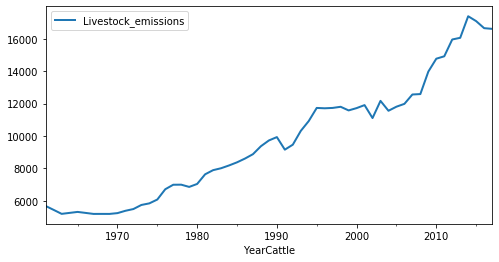

In [27]:
cattle.plot(x = 'YearCattle', y = 'Livestock_emissions', linewidth = 2, figsize = (8,4));

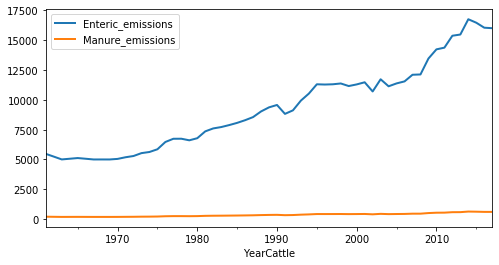

In [28]:
cattle.plot (x = 'YearCattle', y = ['Enteric_emissions','Manure_emissions'], linewidth = 2, figsize = (8,4))

In [29]:
cattle = cattle.drop(['Enteric_emissions', 'Manure_emissions'], axis = 1)

In [30]:
cattle.head()

,YearCattle,Livestock_emissions
0,1961-01-01,5681.4833
1,1962-01-01,5441.7576
2,1963-01-01,5197.4925
3,1964-01-01,5257.3182
4,1965-01-01,5317.1436


In [31]:
cattle['YearCattle'] = pd.to_datetime(cattle['YearCattle'], format='%Y-%m')

In [32]:
cattle = cattle.set_index('YearCattle')

In [33]:
cattle.index

DatetimeIndex(['1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
      

In [34]:
cattle.isnull().sum()

Livestock_emissions    0
dtype: int64

In [35]:
cattle.describe()

,Livestock_emissions
count,57.000000
mean,9683.429202
std,3680.102130
min,5193.829800
25%,6080.590200
50%,9370.086400
75%,11807.634800
max,17386.731000


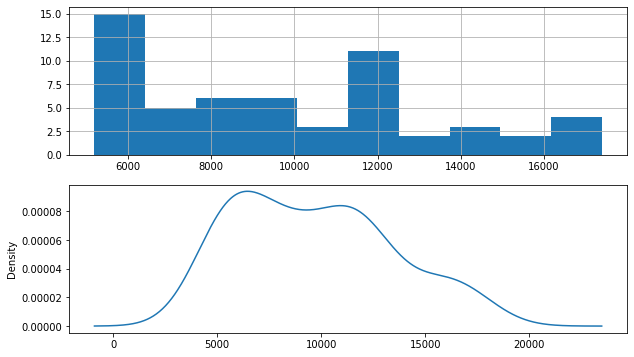

In [36]:
pyplot.figure(1, figsize = (10,6))
pyplot.subplot(211)
cattle.Livestock_emissions.hist()
pyplot.subplot(212)
cattle.Livestock_emissions.plot(kind = 'kde')
pyplot.show()

La mayoría de las emisiones están entre 6000 y 8000 Gg CO2 (moda), sin embargo no coincide con la media (9683.429 Gg CO2eq) ni con la mediana (9370.08 Gg CO2). La distribución de cattle no es normal

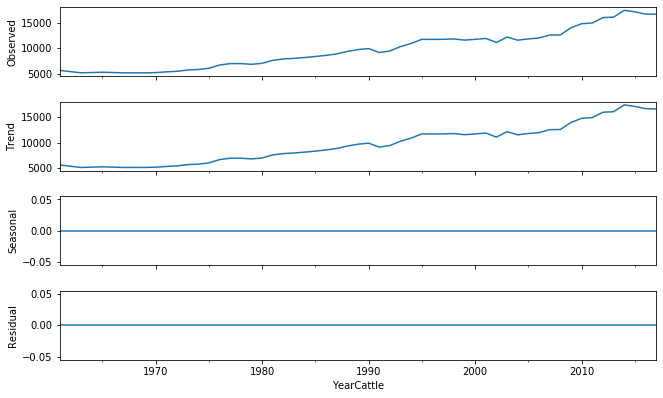

In [37]:
#la frecuencia de nuestros datos es anual, por lo que freq = 1
decomposition = sm.tsa.seasonal_decompose(cattle, freq=1)
fig = decomposition.plot()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.show()

- La 1ª gráfica nos muestra los datos observados
- La 2ª grafica muestra la tendencia de nuesta serie 'Cattle', totalmente ascendente con un ligero pico max aproximadamente por el año 2014/2015.
- La 3ª grafica muesta si esta responde a periodos ciclicos, para 'Cattle' es cero, es decir no responde a ningún periodo estacional o cíclico
- La 4ª grafico muesta los residuos, el cual se presenta con media cero.

### 3B - Crops

#### Recordemos que los datos de Crops son referentes a la emisión de 4 cultivos distintos que he calculado en base a la metodología del [IPCC 2006](https://www.ipcc-nggip.iges.or.jp/public/gp/spanish/4_Agriculture_ES.pdf).

In [38]:
# Eliminaremos las columnas que no utilzaremos de cada uno de los cultivos.
data_soy_clean = data_soy.drop (['Area', 'SOC_ref', 'FLU', 'FMG', 'FI', 'SOC_1', 'SOC_0', 'D', 
                           'AC_Mineral', 'AC_Mineral.1'], axis = 1)

In [39]:
data_soy_clean.head ()

,Year,Cultivo,AC_Mineral.2
0,años,tipo,GgCO2/year
1,1961-01-01 00:00:00,soja,1.76666
2,1962-01-01 00:00:00,soja,2.44615
3,1963-01-01 00:00:00,soja,7.47434
4,1964-01-01 00:00:00,soja,9.85254


In [40]:
data_soy_clean.columns = ['Soy_year', 'Soy_crop', 'Soy_emission']
data_soy_clean.head()

,Soy_year,Soy_crop,Soy_emission
0,años,tipo,GgCO2/year
1,1961-01-01 00:00:00,soja,1.76666
2,1962-01-01 00:00:00,soja,2.44615
3,1963-01-01 00:00:00,soja,7.47434
4,1964-01-01 00:00:00,soja,9.85254


In [41]:
data_corn_clean = data_corn.drop (['Area', 'SOC_ref', 'FLU', 'FMG', 'FI', 'SOC_1', 'SOC_0', 'D', 
                           'AC_Mineral', 'AC_Mineral.1'], axis = 1)
data_corn_clean.columns = ['Corn_year', 'Corn_crop', 'Corn_emission']
data_corn_clean.head()

,Corn_year,Corn_crop,Corn_emission
0,años,tipo,GgCO2/year
1,1961-01-01 00:00:00,Maiz,135.306
2,1962-01-01 00:00:00,Maiz,140.329
3,1963-01-01 00:00:00,Maiz,141.806
4,1964-01-01 00:00:00,Maiz,234.57


In [42]:
data_wheat_clean = data_wheat.drop (['Area', 'SOC_ref', 'FLU', 'FMG', 'FI', 'SOC_1', 'SOC_0', 'D', 
                           'AC_Mineral', 'AC_Mineral.1'], axis = 1)
data_wheat_clean.columns = ['Wheat_year', 'Wheat_crop', 'Wheat_emission']
data_wheat_clean.head()

,Wheat_year,Wheat_crop,Wheat_emission
0,años,tipo,GgCO2/year
1,1961-01-01 00:00:00,Trigo,11.8171
2,1962-01-01 00:00:00,Trigo,14.7714
3,1963-01-01 00:00:00,Trigo,14.3283
4,1964-01-01 00:00:00,Trigo,15.9531


In [43]:
data_pea_clean = data_pea.drop (['Area', 'SOC_ref', 'FLU', 'FMG', 'FI', 'SOC_1', 'SOC_0', 'D', 
                           'AC_Mineral', 'AC_Mineral.1'], axis = 1)
data_pea_clean.columns = ['Pea_year', 'Pea_crop', 'Pea_emission']
data_pea_clean.head()

,Pea_year,Pea_crop,Pea_emission
0,años,tipo,GgCO2/year
1,1961-01-01 00:00:00,Guisantes,4.7564
2,1962-01-01 00:00:00,Guisantes,4.7564
3,1963-01-01 00:00:00,Guisantes,4.8923
4,1964-01-01 00:00:00,Guisantes,4.7564


In [44]:
# Concatemos y luego sumamos las emisiones los cultivos. De esta manera, obtendremos un único df con las emisiones totales.
crops = pd.concat([data_soy_clean, data_corn_clean, data_wheat_clean, data_pea_clean], axis = 1)
crops.head()

,Soy_year,Soy_crop,Soy_emission,Corn_year,Corn_crop,Corn_emission,Wheat_year,Wheat_crop,Wheat_emission,Pea_year,Pea_crop,Pea_emission
0,años,tipo,GgCO2/year,años,tipo,GgCO2/year,años,tipo,GgCO2/year,años,tipo,GgCO2/year
1,1961-01-01 00:00:00,soja,1.76666,1961-01-01 00:00:00,Maiz,135.306,1961-01-01 00:00:00,Trigo,11.8171,1961-01-01 00:00:00,Guisantes,4.7564
2,1962-01-01 00:00:00,soja,2.44615,1962-01-01 00:00:00,Maiz,140.329,1962-01-01 00:00:00,Trigo,14.7714,1962-01-01 00:00:00,Guisantes,4.7564
3,1963-01-01 00:00:00,soja,7.47434,1963-01-01 00:00:00,Maiz,141.806,1963-01-01 00:00:00,Trigo,14.3283,1963-01-01 00:00:00,Guisantes,4.8923
4,1964-01-01 00:00:00,soja,9.85254,1964-01-01 00:00:00,Maiz,234.57,1964-01-01 00:00:00,Trigo,15.9531,1964-01-01 00:00:00,Guisantes,4.7564


In [45]:
crops.rename(columns={'Soy_year': 'Year'}, inplace=True)

In [46]:
crops = crops.drop(['Corn_year', 'Wheat_year', 'Pea_year', 'Soy_crop', 'Corn_crop', 'Wheat_crop', 'Pea_crop'], axis = 1)

In [47]:
crops.head()

,Year,Soy_emission,Corn_emission,Wheat_emission,Pea_emission
0,años,GgCO2/year,GgCO2/year,GgCO2/year,GgCO2/year
1,1961-01-01 00:00:00,1.76666,135.306,11.8171,4.7564
2,1962-01-01 00:00:00,2.44615,140.329,14.7714,4.7564
3,1963-01-01 00:00:00,7.47434,141.806,14.3283,4.8923
4,1964-01-01 00:00:00,9.85254,234.57,15.9531,4.7564


In [48]:
data_crops_sum = crops['Soy_emission'] + crops['Corn_emission'] + crops ['Wheat_emission'] + crops ['Pea_emission']

In [49]:
data_crops_sum.head()

0    GgCO2/yearGgCO2/yearGgCO2/yearGgCO2/year
1                                     153.646
2                                     162.303
3                                     168.501
4                                     265.132
dtype: object

In [50]:
crops = pd.concat([crops, data_crops_sum], axis = 1)
crops.rename(columns={0: 'Crops_emissions', 'Year': 'YearCrops'}, inplace=True)

In [51]:
crops.head()

,YearCrops,Soy_emission,Corn_emission,Wheat_emission,Pea_emission,Crops_emissions
0,años,GgCO2/year,GgCO2/year,GgCO2/year,GgCO2/year,GgCO2/yearGgCO2/yearGgCO2/yearGgCO2/year
1,1961-01-01 00:00:00,1.76666,135.306,11.8171,4.7564,153.646
2,1962-01-01 00:00:00,2.44615,140.329,14.7714,4.7564,162.303
3,1963-01-01 00:00:00,7.47434,141.806,14.3283,4.8923,168.501
4,1964-01-01 00:00:00,9.85254,234.57,15.9531,4.7564,265.132


In [52]:
crops = crops.shift(-1).dropna()

In [53]:
crops['YearCrops'] = pd.to_datetime(crops['YearCrops'], format='%Y-%m')

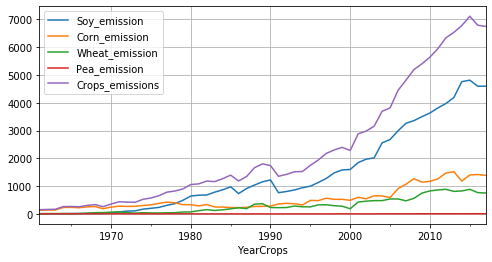

In [54]:
crops.plot(x = 'YearCrops', figsize = (8,4));
plt.grid();

In [55]:
crops = crops.drop(['Soy_emission', 'Corn_emission', 'Wheat_emission', 'Pea_emission'], axis = 1)

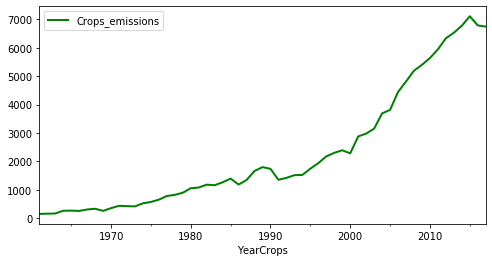

In [56]:
crops.plot(x = 'YearCrops', color = 'green', linewidth = 2, figsize = (8,4));
plt.plot();

In [57]:
crops = crops.set_index('YearCrops')

In [58]:
crops.index

DatetimeIndex(['1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
      

In [59]:
crops.isnull().sum()

Crops_emissions    0
dtype: int64

In [60]:
crops.describe()

,Crops_emissions
count,57.000000
unique,57.000000
top,6527.329437
freq,1.000000


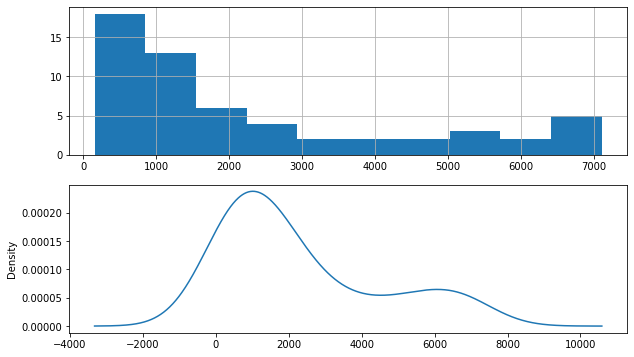

In [61]:
pyplot.figure(1, figsize = (10,6))
pyplot.subplot(211)
crops.Crops_emissions.hist()
pyplot.subplot(212)
crops.Crops_emissions.plot(kind='kde')
pyplot.show()

La mayoría de las emisiones de Crops están entre 1000 y 2000 Gg CO2 (moda), sin embargo no coincide con la media (2278.40 Gg CO2eq) ni con la mediana (1422.79 Gg CO2). La distribución de crops no es normal

In [62]:
crops = crops['Crops_emissions'].astype(float)

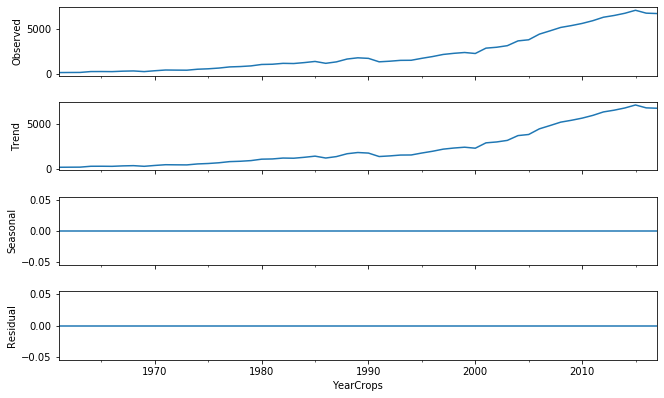

In [63]:
#datos anuales, por lo que freq = 1
decomposition = sm.tsa.seasonal_decompose(crops, freq=1)
fig = decomposition.plot()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.show()

- La 1ª gráfica nos muestra los datos observados
- La 2ª grafica muestra la tendencia de nuesta serie 'Crops', totalmente ascendente con un ligero pico máx aproximadamente por el año 2015.
- La 3ª grafica muesta si esta responde a periodos ciclicos, para 'Crops' es cero, es decir no responde a ningún periodo estacional o cíclico
- La 4ª grafico muesta los residuos, el cual se presenta con media cero.

Crops es una serie con tendencia ascendente, sin periodos estacionales.

# 4 - Stationary series?

De manera intuitiva podemos decir que si una serie tiene un comportamiento particular a lo largo del tiempo, existe una alta probabilidad de que siga el mismo en el futuro.

Ambas variables de análisis presentan únicamente tendencia ascendente durante el periodo (1961-2017). Aunque ciertos años presentan ligeras reducciones.

## 4A - Livestock 

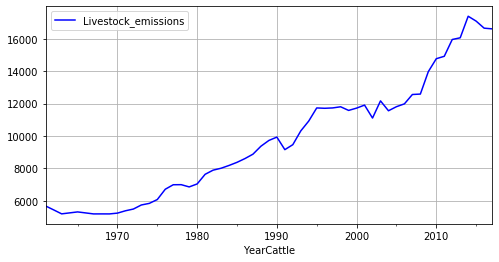

In [64]:
cattle.plot(y = 'Livestock_emissions', figsize=(8,4), color = 'blue');
plt.grid();

### 4A1 - Verificamos la estacionariedad de la serie temporal Cattle

La función ACF es usada para identificar el proceso de media móvil (MA) en un modelo ARIMA; mientras que la función PACF se usa para identificar los valores de la parte del proceso autoregresivo (AR).
- ACF: Mide la correlación entre dos variables separadas por n periodos. Proporciona la estructura de dependencia lineal de la misma.
- PACF: Mide la correlación entre dos variables separadas por n periodos cuando no se considera la dependencia creada por los retardos intermedios existentes entre ambas

Las gráficas de ACF y PACF nos ayudan a analizar la estructura de nuestros datos, como influyen las observaciones del pasado en las observaciones del futuro.

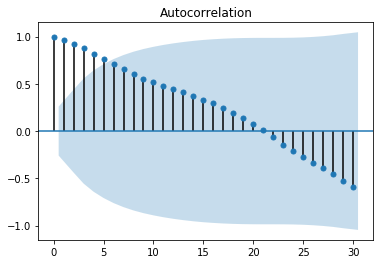

In [65]:
acf(cattle, nlags = 30, unbiased = True, fft = False)
plot_acf(cattle, lags = 30, unbiased = True);

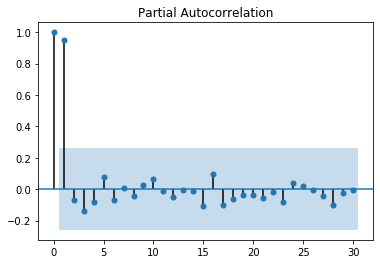

In [66]:
pacf(cattle, nlags = 30, method = "ywm")
plot_pacf(cattle, lags = 30, method = "ywm");

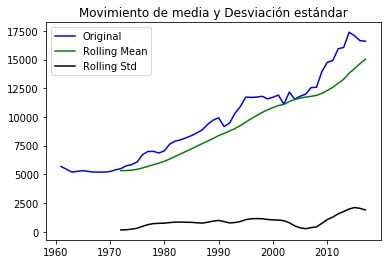

In [67]:
rolmean = cattle.rolling(12).mean()
rolstd = cattle.rolling(12).std()
origin = plt.plot(cattle, color='blue', label='Original')
mean = plt.plot(rolmean, color='green', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.title('Movimiento de media y Desviación estándar')
plt.legend(loc='best')
plt.plot(figsize = (8,4))
plt.show();

- Serie temporal de baja frecuencia = tendencia creciente, varianza que crece con la media.
- La media ascendente
- La desviación estándar es poco constante con respecto al tiempo
- La serie no presenta estacionalidad
- ACF decreciente lentamente - tendencia deterministica

Hemos visto con las 2 métricas anteriores que los datos no son estacionarios. Sin embargo, ambas métricas nos facilitan una apreciación visual.
Apliquemos el test de Dickey - Fuller, para determinar la estacionariedad de la serie temporal Cattle en números. 

In [68]:
adfuller (cattle.Livestock_emissions)

(0.9401989156529424,
 0.9935931353833158,
 0,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 684.672860034365)

- La estadistica del test es positiva: 0.94
- p-value no es menor que los valores críticos y > 0.05
- Se acepta la h0 = serie NO estacionaria debido a su tendencia

Definimos una función que utilizaremos proximamente para graficar la media movil y la desviación estándar:

In [69]:
def stationarity_test(timeseries):
    
    #Determinamos la media móvil y la desviación estándar
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Graficamos el movimiento de la media y la desviación estándar:
    plt.rcParams["figure.figsize"] = (10,6)
    orig = plt.plot(timeseries, color = 'blue',label = 'Data')
    mean = plt.plot(rolmean, color = 'green', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.title('Movimiento de la media y Desviación estándar')
    plt.legend(loc = 'best')
    plt.show()

### 4A2 - Transformamos la serie temporal Cattle a estacionaria

Existen 2 razones principales por la que una serie temporal no es estacionaria:

 - La primera es la tendencia (aplicada a las series temporales Cattle y Crops), la media varia con el tiempo.
 - La segunda es la estacionalidad (no aplica, gráfico de seasonal = 0), donde se dan variaciones de tiempo en periodos específicos

#### Log Scale Transformation

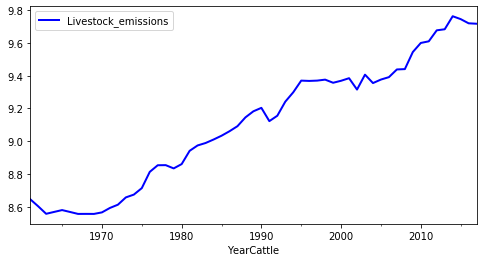

In [70]:
cattle_log = np.log(cattle)
cattle_log.plot(figsize = (8,4), color = 'blue', linewidth = 2);

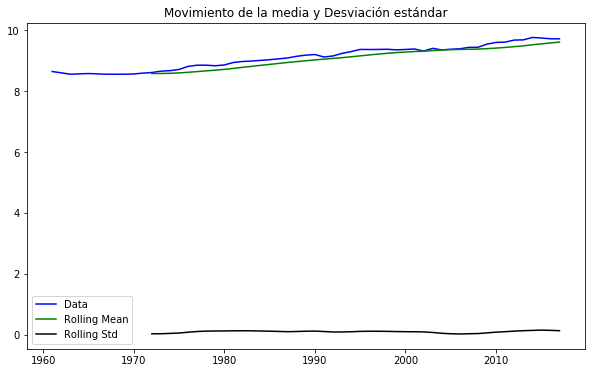

In [71]:
stationarity_test(cattle_log)

In [72]:
adfuller(cattle_log.Livestock_emissions)

(0.35091188471675266,
 0.9795634398766306,
 0,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 -158.97232911467762)

No conseguimos transformar la serie a estacionaria mediante la logaritmación.
Cuanto más negativo es el estadistico del test el rechazo de la hipotesis es más fuerte, en este caso no podemos rechazar la h0.
- Estadístico con valor positivo: 0.35
- p-value > 0.05


#### Diferenciación

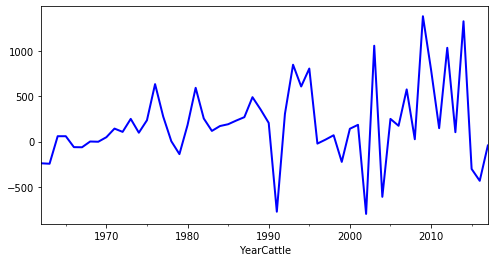

In [73]:
cattle_diff = cattle.Livestock_emissions - cattle.Livestock_emissions.shift(1)
cattle_diff.dropna(inplace = True)
cattle_diff.plot(figsize = (8,4), color = 'blue', linewidth = 2);

El método de diferenciación ha permitido eliminar la tendencia de la serie.
Pero, es estacionaria?

In [74]:
adfuller(cattle_diff)

(-7.568866326437851,
 2.8767438974978154e-11,
 0,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 670.115895483676)

Finalmente hemos conseguido una serie estacionaria.
- Estadístico negativo
- p-value < 0.05
- Rechazamos la h0. Test estadístico = -7.568

Veamos como queda el gráfico de descomposición estacional luego de aplicar la diferenciación

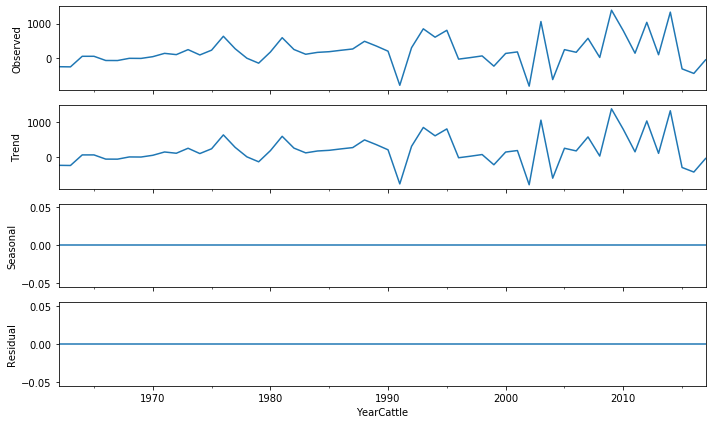

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(cattle_diff)
fig = decomposition.plot()
plt.show()

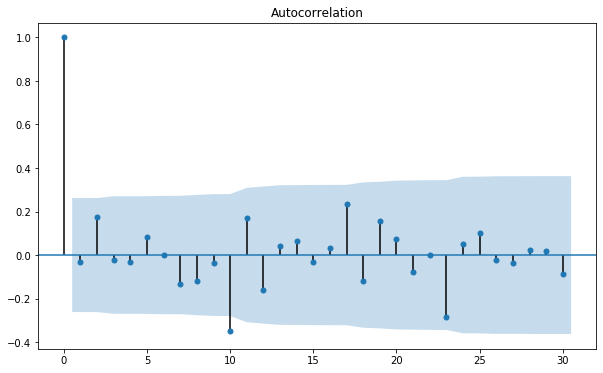

In [76]:
#ploteamos ACF Y PACF de datos modificados
acf(cattle_diff, nlags = 30, unbiased = True, fft = False)
plot_acf(cattle_diff, lags = 30, unbiased = True);

Hemos realizado la diferenciación en 1 retardo para lograr estacionar la serie, los coeficientes son significativos solo en el primer retardo.

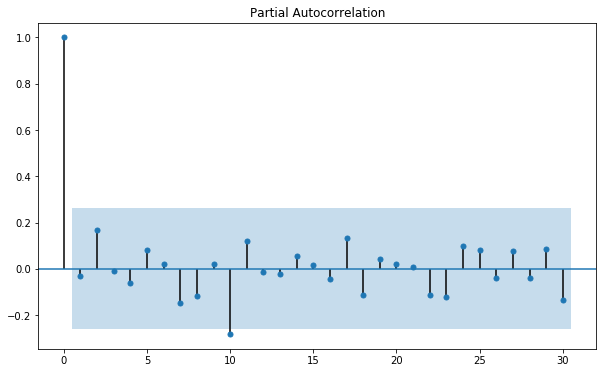

In [77]:
pacf(cattle_diff, nlags = 30, method = "ywm")
plot_pacf(cattle_diff, lags = 30, method = "ywm");

Autocorrelación significativa de primer orden (retraso de primer orden)

## 4B - Crops

In [78]:
# Los cultivos, al igual que la ganadería tienen una tendencia ascendente

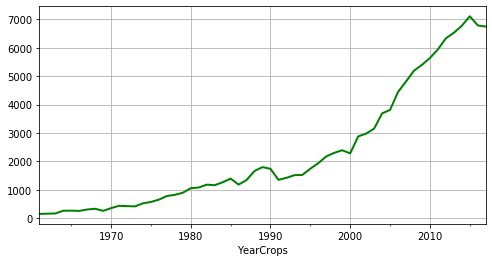

In [79]:
crops.plot(y = 'Crops_emissions', figsize=(8,4), color = 'green', linewidth = 2);
plt.grid();

### 4B1 - Verificamos la estacionariedad de "Crops"

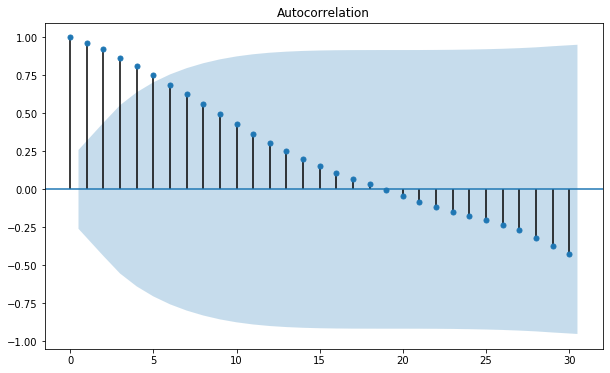

In [80]:
acf(crops, nlags = 30, unbiased = True, fft = False)
plot_acf(crops, lags = 30, unbiased = True);

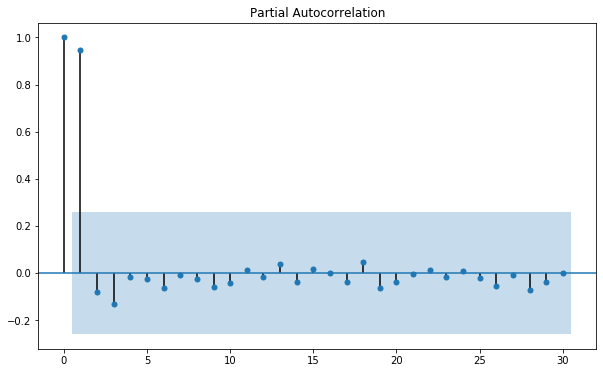

In [81]:
pacf(crops, nlags = 30, method = "ywm")
plot_pacf(crops, lags = 30, method = "ywm");

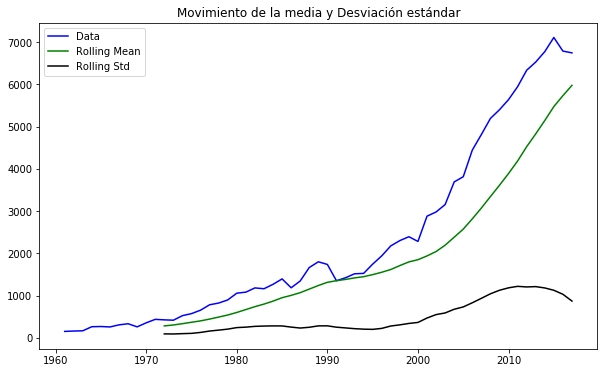

In [82]:
stationarity_test(crops)

- Serie temporal de baja frecuencia = tendencia creciente, varianza que crece con la media.
- ACF decrece lentamente, serie deterministica

La media móvil tiene tendencia ascendente, sin embargo, la desviación estándar va relativamente constante con el tiempo.
Para que la serie sea estacionaria, debemos asegurarnos de que tanto las medias móviles como la desviación son invariantes con respecto al tiempo.

In [83]:
adfuller (crops)

(2.4891880623141853,
 0.9990462809997176,
 0,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 605.6543333614368)

- La estadística del test es positiva
- p-value > 0.05
- Se acepta la h0 = serie NO estacionaria debido a su tendencia ascendente

### 4B2 - Transformamos la serie temporal Crops a estacionaria

#### Log Scale Transformation

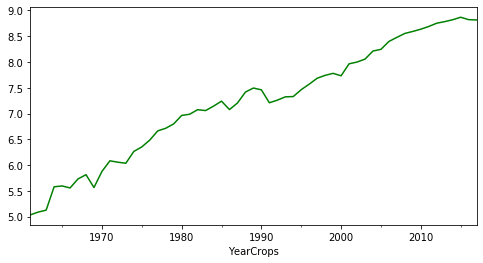

In [84]:
crops_log = np.log(crops)
crops_log.plot(figsize = (8,4), color = 'green');

Se sigue apreciando una tendencia creciente luego de la transformación logaritmica

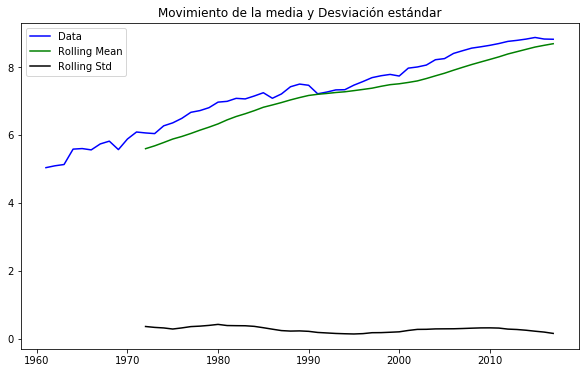

In [85]:
stationarity_test(crops_log)

In [86]:
adfuller(crops_log)

(-1.613970559461707,
 0.4758916836251223,
 0,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 -88.57603201345881)

- No logramos una serie estacionaria con la logaritmación
- Estadistico mayor a los valores críticos
- p-value > 0.05

#### Diferenciación

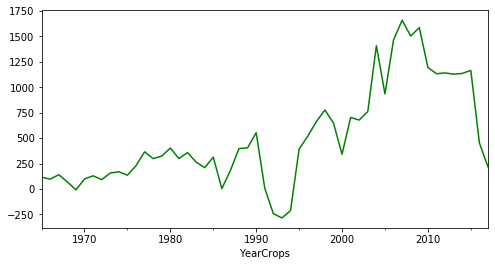

In [87]:
crops_diff = crops - crops.shift(4)
crops_diff.dropna(inplace = True)
crops_diff.plot(figsize = (8,4), color = 'green');

El método de diferenciación ha permitido eliminar la tendencia de la serie. Sin embargo, fue necesario aplicar el retardo en 4 lags. Comprobaremos si es estacionaria con el test de Dickey Fuller.

In [88]:
adfuller(crops_diff)

(-3.345084826201461,
 0.012979595039883746,
 11,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 560.7847697889499)

Se logra la estacionariedad de la serie luego de 4 diferenciaciones, sin embargo, los valores están muy ajustados. Rechazamos la h0 con ciertas precauciones.

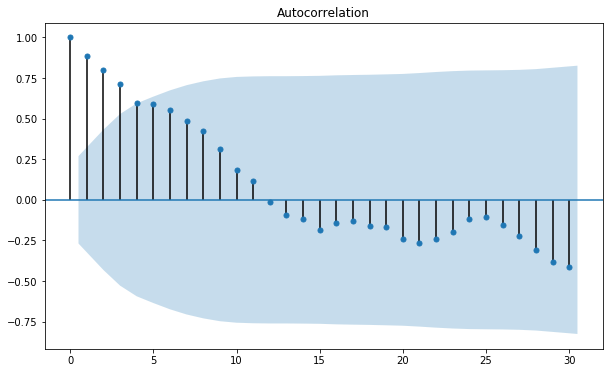

In [89]:
#plotear ACF Y PACF con la modificación
acf(crops_diff, nlags = 30, unbiased = True, fft = False)
plot_acf(crops_diff, lags = 30, unbiased = True);

Hemos realizado la diferenciación en 4 retardos para lograr estacionar la serie, los coeficientes son significativos hasta el cuarto retardo.

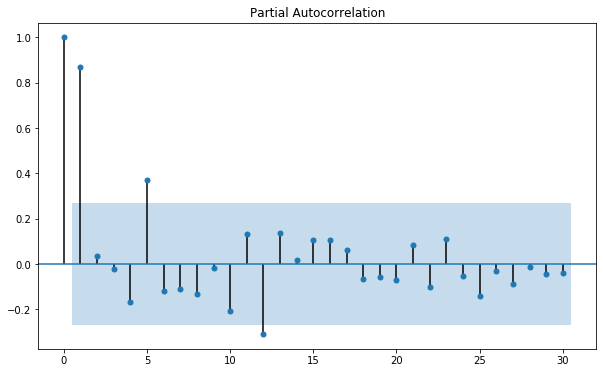

In [90]:
pacf(crops_diff, nlags = 30, method = "ywm")
plot_pacf(crops_diff, lags = 30, method = "ywm");

Correlación significativa en el primer y segundo desface.

# 5 - Time Series Forecasting

A qué orden se ajustan mejor las series Cattle y Crops? 

Hemos determinado los valores de AR(p):(ACF) y MA(q):(PACF) que se adaptarian mejor a las series temporales Cattle y Crops. Sin embargo, optamos por hacer unas pruebas con AIC y BIC con distintos ordenes para la autorregresion y las medias móviles y así determinar el orden (p y q) del modelo ARIMA o una aproximación más precisa.


### 5A1 - AutoRegression (AR) Livestock

In [91]:
model_AR1 = SARIMAX(cattle_diff, order = (1, 0, 0)).fit()
model_AR2 = SARIMAX(cattle_diff, order = (2, 0, 0)).fit()
model_AR3 = SARIMAX(cattle_diff, order = (3, 0, 0)).fit()
model_AR4 = SARIMAX(cattle_diff, order = (4, 0, 0)).fit()
model_AR5 = SARIMAX(cattle_diff, order = (5, 0, 0)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, Valu

In [92]:
print("Orden 1:")
print("AIC: {:.4f}".format(model_AR1.aic))
print("BIC: {:.4f}".format(model_AR1.bic))
print("\nOrden 2:")
print("AIC: {:.4f}".format(model_AR2.aic))
print("BIC: {:.4f}".format(model_AR2.bic))
print("\nOrden 3:")
print("AIC: {:.4f}".format(model_AR3.aic))
print("BIC: {:.4f}".format(model_AR3.bic))
print("\nOrden 4:")
print("AIC: {:.4f}".format(model_AR4.aic))
print("BIC: {:.4f}".format(model_AR4.bic))
print("\nOrden 5:")
print("AIC: {:.4f}".format(model_AR4.aic))
print("BIC: {:.4f}".format(model_AR4.bic))

Orden 1:
AIC: 852.1978
BIC: 856.2485

Orden 2:
AIC: 848.4444
BIC: 854.5205

Orden 3:
AIC: 849.6922
BIC: 857.7937

Orden 4:
AIC: 851.6915
BIC: 861.8182

Orden 5:
AIC: 851.6915
BIC: 861.8182


In [93]:
model_AR = SARIMAX(cattle_diff, order = (2,0,0)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [94]:
model_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:     Livestock_emissions   No. Observations:                   56
Model:                SARIMAX(2, 0, 0)   Log Likelihood                -421.222
Date:                 Wed, 23 Sep 2020   AIC                            848.444
Time:                         11:55:26   BIC                            854.520
Sample:                     01-01-1962   HQIC                           850.800
                          - 01-01-2017                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1014      0.119      0.852      0.394      -0.132       0.335
ar.L2          0.3105      0.095      3.258      0.001       0.124       0.497
sigma2      2.047e+05   3.37e+04      6.068      0.000    1.39e+05    2.71e+05
===================================================================================
Ljung-Box (Q):                       29.97   Jarque-Bera (JB):                 1.73
Prob(Q):                              0.88   Prob(JB):                         0.42
Heteroskedasticity (H):               9.74   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
prediction_AR = model_AR.get_forecast(steps = 23)
prediction_AR

In [96]:
prediction_AR.conf_int().head()

,lower Livestock_emissions,upper Livestock_emissions
2018-01-01,-1025.656640,748.050643
2019-01-01,-918.776074,864.033651
2020-01-01,-981.582645,889.829400
2021-01-01,-950.580910,924.275242
2022-01-01,-957.719028,926.560038


In [97]:
lower_AR = prediction_AR.conf_int()["lower Livestock_emissions"]
upper_AR = prediction_AR.conf_int()["upper Livestock_emissions"]

In [98]:
model_AR.predict(start = len(cattle), end = len(cattle) + 17)

2019-01-01   -27.371211
2020-01-01   -45.876622
2021-01-01   -13.152834
2022-01-01   -15.579495
2023-01-01    -5.664506
2024-01-01    -5.412238
2025-01-01    -2.307918
2026-01-01    -1.914684
2027-01-01    -0.910863
2028-01-01    -0.686932
2029-01-01    -0.352517
2030-01-01    -0.249060
2031-01-01    -0.134726
2032-01-01    -0.091003
2033-01-01    -0.051065
2034-01-01    -0.033438
2035-01-01    -0.019248
2036-01-01    -0.012335
Freq: AS-JAN, dtype: float64

In [99]:
model_AR.fittedvalues

YearCattle
1962-01-01      0.000000
1963-01-01    -35.269374
1964-01-01    -99.216124
1965-01-01    -69.778679
1966-01-01     24.645328
1967-01-01     12.383993
1968-01-01    -25.272087
1969-01-01    -19.210956
1970-01-01      0.255278
1971-01-01      4.574892
1972-01-01     29.778934
1973-01-01     55.659095
1974-01-01     58.926381
1975-01-01     88.016397
1976-01-01     54.572068
1977-01-01    137.848519
1978-01-01    225.429752
1979-01-01     86.580513
1980-01-01    -12.655142
1981-01-01    -24.325637
1982-01-01    117.218436
1983-01-01    210.545476
1984-01-01     91.364967
1985-01-01     54.257682
1986-01-01     73.008619
1987-01-01     83.254585
1988-01-01     99.691996
1989-01-01    133.780198
1990-01-01    188.562237
1991-01-01    131.312397
1992-01-01    -14.382100
1993-01-01   -209.331356
1994-01-01    181.503053
1995-01-01    325.664818
1996-01-01    271.092819
1997-01-01    248.531839
1998-01-01     -4.527993
1999-01-01     14.028168
2000-01-01     -0.841414
2001-01-01    

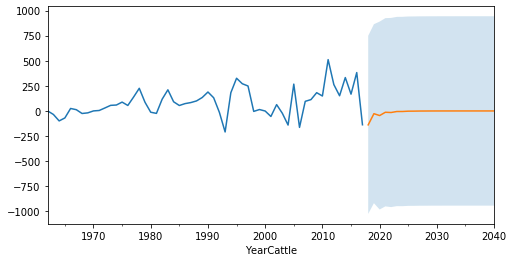

In [100]:
fig, ax = plt.subplots(figsize = (8,4))
model_AR.fittedvalues.plot(ax = ax)
prediction_AR.predicted_mean.plot(ax = ax)
ax.fill_between(lower_AR.index, lower_AR, upper_AR, alpha = 0.2)
plt.show()

### 5B1 - AutoRegression (AR) Crops

In [101]:
model_AR1_crops = SARIMAX(crops_diff, order = (1, 0, 0)).fit()
model_AR2_crops = SARIMAX(crops_diff, order = (2, 0, 0)).fit()
model_AR3_crops = SARIMAX(crops_diff, order = (3, 0, 0)).fit()
model_AR4_crops = SARIMAX(crops_diff, order = (4, 0, 0)).fit()
model_AR5_crops = SARIMAX(crops_diff, order = (5, 0, 0)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, Valu

In [102]:
print("Orden 1:")
print("AIC: {:.4f}".format(model_AR1_crops.aic))
print("BIC: {:.4f}".format(model_AR1_crops.bic))
print("\nOrden 2:")
print("AIC: {:.4f}".format(model_AR2_crops.aic))
print("BIC: {:.4f}".format(model_AR2_crops.bic))
print("\nOrden 3:")
print("AIC: {:.4f}".format(model_AR3_crops.aic))
print("BIC: {:.4f}".format(model_AR3_crops.bic))
print("\nOrden 4:")
print("AIC: {:.4f}".format(model_AR4_crops.aic))
print("BIC: {:.4f}".format(model_AR4_crops.bic))
print("\nOrden 5:")
print("AIC: {:.4f}".format(model_AR5_crops.aic))
print("BIC: {:.4f}".format(model_AR5_crops.bic))

Orden 1:
AIC: 735.8233
BIC: 739.7639

Orden 2:
AIC: 737.6457
BIC: 743.5566

Orden 3:
AIC: 739.3995
BIC: 747.2807

Orden 4:
AIC: 739.9376
BIC: 749.7890

Orden 5:
AIC: 729.1151
BIC: 740.9368


In [103]:
model_AR_crops = SARIMAX(crops_diff, order = (5,0,0)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [104]:
model_AR_crops.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:        Crops_emissions   No. Observations:                   53
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -358.558
Date:                Wed, 23 Sep 2020   AIC                            729.115
Time:                        11:55:27   BIC                            740.937
Sample:                    01-01-1965   HQIC                           733.661
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9541      0.123      7.735      0.000       0.712       1.196
ar.L2          0.1132      0.132      0.857      0.391      -0.146       0.372
ar.L3         -0.0333      0.167     -0.199      0.842      -0.360       0.294
ar.L4         -0.5761      0.178     -3.231      0.001      -0.926      -0.227
ar.L5          0.4954      0.124      3.986      0.000       0.252       0.739
sigma2      4.127e+04   6906.135      5.976      0.000    2.77e+04    5.48e+04
===================================================================================
Ljung-Box (Q):                       37.25   Jarque-Bera (JB):                11.61
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):              15.37   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
prediction_AR_crops = model_AR_crops.get_forecast(steps = 18)

In [106]:
prediction_AR_crops.conf_int()

,lower Crops_emissions,upper Crops_emissions
2018-01-01,-273.408170,522.964615
2019-01-01,-530.447631,570.222486
2020-01-01,-343.346897,1026.213983
2021-01-01,-379.168782,1225.924078
2022-01-01,-350.247566,1305.582349
2023-01-01,-310.590479,1395.841505
2024-01-01,-497.134242,1238.779396
2025-01-01,-553.000104,1202.070061
2026-01-01,-637.756096,1173.927234
2027-01-01,-724.705492,1133.068655


In [107]:
lower_AR_crops = prediction_AR_crops.conf_int()["lower Crops_emissions"]
upper_AR_crops = prediction_AR_crops.conf_int()["upper Crops_emissions"]

In [108]:
model_AR_crops.predict(start = len(crops), end = len(crops) + 17)

2022-01-01    477.667392
2023-01-01    542.625513
2024-01-01    370.822577
2025-01-01    324.534979
2026-01-01    268.085569
2027-01-01    204.181582
2028-01-01    269.514789
2029-01-01    268.052525
2030-01-01    285.768288
2031-01-01    309.180641
2032-01-01    264.278445
2033-01-01    256.705632
2034-01-01    232.689800
2035-01-01    205.703308
2036-01-01    214.955449
2037-01-01    203.647121
2038-01-01    204.887278
2039-01-01    208.132358
Freq: AS-JAN, dtype: float64

In [109]:
model_AR_crops.fittedvalues

YearCrops
1965-01-01       0.000000
1966-01-01     106.964911
1967-01-01      90.271553
1968-01-01     126.397399
1969-01-01      67.150874
1970-01-01      -2.850524
1971-01-01      57.304196
1972-01-01     164.575346
1973-01-01     138.388316
1974-01-01      95.769890
1975-01-01     149.987842
1976-01-01     154.912573
1977-01-01     183.090405
1978-01-01     350.335875
1979-01-01     324.060030
1980-01-01     265.798458
1981-01-01     313.279400
1982-01-01     328.930252
1983-01-01     323.156444
1984-01-01     212.096239
1985-01-01     245.064996
1986-01-01     255.264527
1987-01-01      56.215375
1988-01-01     175.220133
1989-01-01     323.329802
1990-01-01     578.402507
1991-01-01     455.918685
1992-01-01     -82.562516
1993-01-01    -285.257747
1994-01-01    -416.112340
1995-01-01      43.304135
1996-01-01     502.395658
1997-01-01     589.426301
1998-01-01     657.330782
1999-01-01     467.301974
2000-01-01     580.134624
2001-01-01     249.949233
2002-01-01     567.510727
20

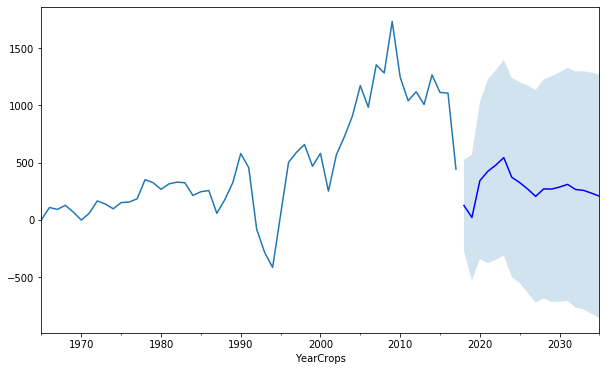

In [110]:
fig, ax = plt.subplots(figsize = (10,6))
model_AR_crops.fittedvalues.plot(ax = ax)
prediction_AR_crops.predicted_mean.plot(ax = ax, color = 'blue')
ax.fill_between(lower_AR_crops.index, lower_AR_crops, upper_AR_crops, alpha = 0.2)
plt.show();

### 5A2 - Moving Average (MA) Livestock

In [111]:
model_MA1 = SARIMAX(cattle_diff, order = (0, 0, 1)).fit()
model_MA2 = SARIMAX(cattle_diff, order = (0, 0, 2)).fit()
model_MA3 = SARIMAX(cattle_diff, order = (0, 0, 3)).fit()
model_MA4 = SARIMAX(cattle_diff, order = (0, 0, 4)).fit()
model_MA5 = SARIMAX(cattle_diff, order = (0, 0, 5)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, Valu

In [112]:
print("Orden 1:")
print("AIC: {:.4f}".format(model_MA1.aic))
print("BIC: {:.4f}".format(model_MA1.bic))
print("\nOrden 2:")
print("AIC: {:.4f}".format(model_MA2.aic))
print("BIC: {:.4f}".format(model_MA2.bic))
print("\nOrden 3:")
print("AIC: {:.4f}".format(model_MA3.aic))
print("BIC: {:.4f}".format(model_MA3.bic))
print("\nOrden 4:")
print("AIC: {:.4f}".format(model_MA4.aic))
print("BIC: {:.4f}".format(model_MA4.bic))
print("\nOrden 5:")
print("AIC: {:.4f}".format(model_MA5.aic))
print("BIC: {:.4f}".format(model_MA5.bic))

Orden 1:
AIC: 852.6683
BIC: 856.7190

Orden 2:
AIC: 849.1764
BIC: 855.2524

Orden 3:
AIC: 851.0375
BIC: 859.1389

Orden 4:
AIC: 853.0017
BIC: 863.1284

Orden 5:
AIC: 851.5097
BIC: 863.6618


In [113]:
model_MA = SARIMAX(cattle_diff, order = (0, 0, 2)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [114]:
model_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:     Livestock_emissions   No. Observations:                   56
Model:                SARIMAX(0, 0, 2)   Log Likelihood                -421.588
Date:                 Wed, 23 Sep 2020   AIC                            849.176
Time:                         11:55:28   BIC                            855.252
Sample:                     01-01-1962   HQIC                           851.532
                          - 01-01-2017                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0811      0.119      0.680      0.496      -0.153       0.315
ma.L2          0.3208      0.117      2.742      0.006       0.091       0.550
sigma2      2.018e+05   3.23e+04      6.245      0.000    1.38e+05    2.65e+05
===================================================================================
Ljung-Box (Q):                       28.62   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.91   Prob(JB):                         0.38
Heteroskedasticity (H):               9.16   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
prediction_MA = model_MA.get_forecast(steps = 12)

In [116]:
model_MA.predict(start = len(cattle), end = len(cattle) + 12)

2019-01-01    49.71833
2020-01-01     0.00000
2021-01-01     0.00000
2022-01-01     0.00000
2023-01-01     0.00000
2024-01-01     0.00000
2025-01-01     0.00000
2026-01-01     0.00000
2027-01-01     0.00000
2028-01-01     0.00000
2029-01-01     0.00000
2030-01-01     0.00000
2031-01-01     0.00000
Freq: AS-JAN, dtype: float64

In [117]:
model_MA.fittedvalues

YearCattle
1962-01-01      0.000000
1963-01-01    -23.157888
1964-01-01    -84.636909
1965-01-01    -52.397243
1966-01-01     54.741902
1967-01-01     26.244152
1968-01-01    -44.256576
1969-01-01    -24.676595
1970-01-01     16.488529
1971-01-01     10.148599
1972-01-01     21.243461
1973-01-01     49.972981
1974-01-01     44.063069
1975-01-01     68.990044
1976-01-01     31.053972
1977-01-01    102.730907
1978-01-01    208.023962
1979-01-01     39.504060
1980-01-01    -79.740158
1981-01-01    -35.664170
1982-01-01    135.506719
1983-01-01    211.906124
1984-01-01     30.921659
1985-01-01    -18.508287
1986-01-01     62.462663
1987-01-01     81.371777
1988-01-01     69.954221
1989-01-01     94.809474
1990-01-01    156.258634
1991-01-01     87.673165
1992-01-01    -53.784645
1993-01-01   -247.266495
1994-01-01    204.727086
1995-01-01    384.727156
1996-01-01    164.067826
1997-01-01    120.537629
1998-01-01    -67.612231
1999-01-01    -20.352371
2000-01-01     27.764107
2001-01-01    

In [118]:
lower_MA = prediction_MA.conf_int()["lower Livestock_emissions"]
upper_MA = prediction_MA.conf_int()["upper Livestock_emissions"]

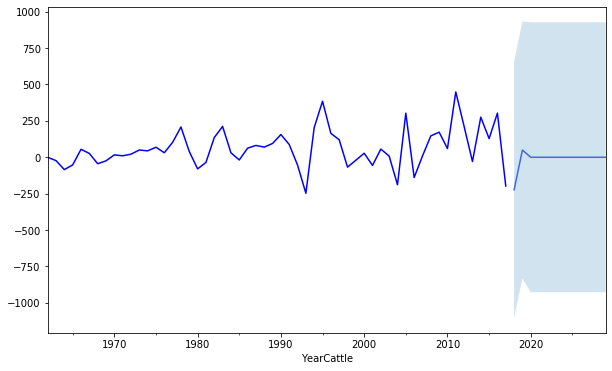

In [119]:
fig, ax = plt.subplots(figsize = (10,6))
model_MA.fittedvalues.plot(ax=ax, color = 'blue')
prediction_MA.predicted_mean.plot(ax = ax, color = 'royalblue')
ax.fill_between(lower_MA.index, lower_MA, upper_MA, alpha = 0.2)
plt.show()

### 5B2 - Moving Average (MA) Crops

In [120]:
model_MA1_crops = SARIMAX(crops_diff, order = (0, 0, 1)).fit()
model_MA2_crops = SARIMAX(crops_diff, order = (0, 0, 2)).fit()
model_MA3_crops = SARIMAX(crops_diff, order = (0, 0, 3)).fit()
model_MA4_crops = SARIMAX(crops_diff, order = (0, 0, 4)).fit()
model_MA5_crops = SARIMAX(crops_diff, order = (0, 0, 5)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

In [121]:
print("Orden 1:")
print("AIC: {:.4f}".format(model_MA1_crops.aic))
print("BIC: {:.4f}".format(model_MA1_crops.bic))
print("\nOrden 2:")
print("AIC: {:.4f}".format(model_MA2_crops.aic))
print("BIC: {:.4f}".format(model_MA2_crops.bic))
print("\nOrden 3:")
print("AIC: {:.4f}".format(model_MA3_crops.aic))
print("BIC: {:.4f}".format(model_MA3_crops.bic))
print("\nOrden 4:")
print("AIC: {:.4f}".format(model_MA4_crops.aic))
print("BIC: {:.4f}".format(model_MA4_crops.bic))
print("\nOrden 5:")
print("AIC: {:.4f}".format(model_MA5_crops.aic))
print("BIC: {:.4f}".format(model_MA5_crops.bic))

Orden 1:
AIC: 789.7734
BIC: 793.7140

Orden 2:
AIC: 780.3155
BIC: 786.2264

Orden 3:
AIC: 741.0288
BIC: 748.9100

Orden 4:
AIC: 736.9160
BIC: 746.7675

Orden 5:
AIC: 734.2068
BIC: 746.0285


In [122]:
model_MA_crops = SARIMAX(crops_diff, order = (0, 0, 5)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [123]:
model_MA_crops.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:        Crops_emissions   No. Observations:                   53
Model:               SARIMAX(0, 0, 5)   Log Likelihood                -361.103
Date:                Wed, 23 Sep 2020   AIC                            734.207
Time:                        11:55:30   BIC                            746.029
Sample:                    01-01-1965   HQIC                           738.753
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.1278      0.271      4.156      0.000       0.596       1.660
ma.L2          1.3715      0.215      6.381      0.000       0.950       1.793
ma.L3          1.3378      0.337      3.971      0.000       0.677       1.998
ma.L4          0.5402      0.239      2.260      0.024       0.072       1.009
ma.L5          0.4460      0.139      3.200      0.001       0.173       0.719
sigma2      4.346e+04   1.74e-05   2.49e+09      0.000    4.35e+04    4.35e+04
===================================================================================
Ljung-Box (Q):                       38.50   Jarque-Bera (JB):                 1.52
Prob(Q):                              0.54   Prob(JB):                         0.47
Heteroskedasticity (H):              12.37   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.07e+25. Standard errors may be unstable.
"""

In [124]:
prediction_MA_crops = model_MA_crops.get_forecast(steps = 23)

In [125]:
model_MA_crops.predict(start = len(crops), end = len(crops) + 23)

2022-01-01   -5.166322
2023-01-01    0.000000
2024-01-01    0.000000
2025-01-01    0.000000
2026-01-01    0.000000
2027-01-01    0.000000
2028-01-01    0.000000
2029-01-01    0.000000
2030-01-01    0.000000
2031-01-01    0.000000
2032-01-01    0.000000
2033-01-01    0.000000
2034-01-01    0.000000
2035-01-01    0.000000
2036-01-01    0.000000
2037-01-01    0.000000
2038-01-01    0.000000
2039-01-01    0.000000
2040-01-01    0.000000
2041-01-01    0.000000
2042-01-01    0.000000
2043-01-01    0.000000
2044-01-01    0.000000
2045-01-01    0.000000
Freq: AS-JAN, dtype: float64

In [126]:
model_MA.fittedvalues

YearCattle
1962-01-01      0.000000
1963-01-01    -23.157888
1964-01-01    -84.636909
1965-01-01    -52.397243
1966-01-01     54.741902
1967-01-01     26.244152
1968-01-01    -44.256576
1969-01-01    -24.676595
1970-01-01     16.488529
1971-01-01     10.148599
1972-01-01     21.243461
1973-01-01     49.972981
1974-01-01     44.063069
1975-01-01     68.990044
1976-01-01     31.053972
1977-01-01    102.730907
1978-01-01    208.023962
1979-01-01     39.504060
1980-01-01    -79.740158
1981-01-01    -35.664170
1982-01-01    135.506719
1983-01-01    211.906124
1984-01-01     30.921659
1985-01-01    -18.508287
1986-01-01     62.462663
1987-01-01     81.371777
1988-01-01     69.954221
1989-01-01     94.809474
1990-01-01    156.258634
1991-01-01     87.673165
1992-01-01    -53.784645
1993-01-01   -247.266495
1994-01-01    204.727086
1995-01-01    384.727156
1996-01-01    164.067826
1997-01-01    120.537629
1998-01-01    -67.612231
1999-01-01    -20.352371
2000-01-01     27.764107
2001-01-01    

In [127]:
lower_MA_crops = prediction_MA_crops.conf_int()["lower Crops_emissions"]
upper_MA_crops = prediction_MA_crops.conf_int()["upper Crops_emissions"]

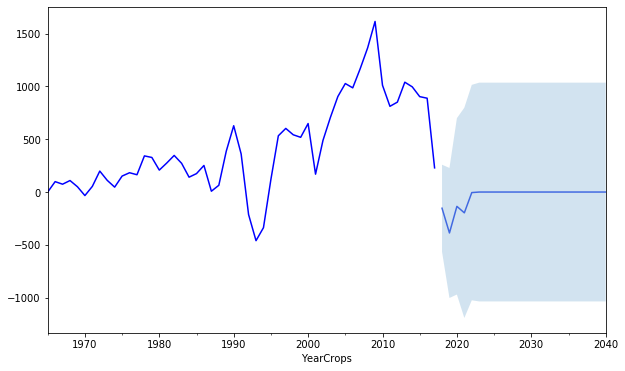

In [128]:
fig, ax = plt.subplots(figsize = (10,6))
model_MA_crops.fittedvalues.plot(ax=ax, color = 'blue')
prediction_MA_crops.predicted_mean.plot(ax = ax, color = 'royalblue')
ax.fill_between(lower_MA_crops.index, lower_MA_crops, upper_MA_crops, alpha = 0.2)
plt.show()

### 5C1 - Autoregressive integrated moving average (ARIMA) -  Livestock

In [129]:
train_cattle = cattle[:int(0.90*(len(cattle)))]
test_cattle = cattle[int(0.90*(len(cattle))):]

In [130]:
# Escogí la proporción 90:10 ya que ambas series son pequeñas (56 datos para cada serie temporal)

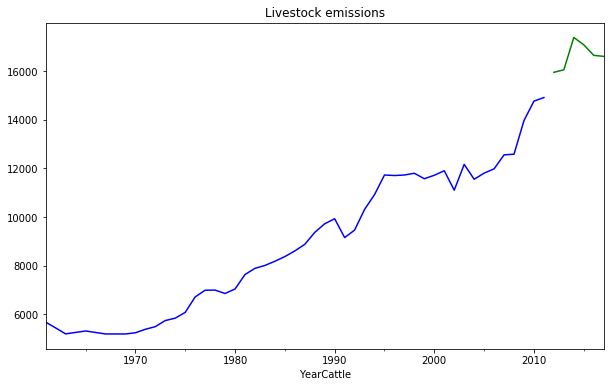

In [131]:
train_cattle['Livestock_emissions'].plot(color = 'blue', figsize=(10,6))
test_cattle['Livestock_emissions'].plot(color = 'green');
plt.title('Livestock emissions');

In [132]:
# Planteamos los valores de p y q alrededor de la diferenciación que hicimos a la serie temporal Cattle.

In [133]:
model_ARIMA1 = SARIMAX(train_cattle, order = (1, 1, 1)).fit()
model_ARIMA2 = SARIMAX(train_cattle, order = (2, 1, 2)).fit()
model_ARIMA3 = SARIMAX(train_cattle, order = (3, 1, 3)).fit()
model_ARIMA4 = SARIMAX(train_cattle, order = (4, 1, 4)).fit()
model_ARIMA5 = SARIMAX(train_cattle, order = (5, 1, 5)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq,

Busquemos el mejor modelo en base a los valores de AIC Y BIC

In [134]:
print("Model_ARIMA1:")
print("AIC: {:.4f}".format(model_ARIMA1.aic))
print("BIC: {:.4f}".format(model_ARIMA1.bic))
print("\nModel_ARIMA2:")
print("AIC: {:.4f}".format(model_ARIMA2.aic))
print("BIC: {:.4f}".format(model_ARIMA2.bic))
print("\nModel_ARIMA3:")
print("AIC: {:.4f}".format(model_ARIMA3.aic))
print("BIC: {:.4f}".format(model_ARIMA3.bic))
print("\nModel_ARIMA4:")
print("AIC: {:.4f}".format(model_ARIMA4.aic))
print("BIC: {:.4f}".format(model_ARIMA4.bic))
print("\nModel_ARIMA5:")
print("AIC: {:.4f}".format(model_ARIMA5.aic))
print("BIC: {:.4f}".format(model_ARIMA5.bic))

Model_ARIMA1:
AIC: 748.3724
BIC: 754.1085

Model_ARIMA2:
AIC: 751.7880
BIC: 761.3482

Model_ARIMA3:
AIC: 755.6159
BIC: 769.0001

Model_ARIMA4:
AIC: 761.3307
BIC: 778.5389

Model_ARIMA5:
AIC: 766.0683
BIC: 787.1006


In [135]:
#Optamos por el mejor modelo (AIC y BIC menores)
model_ARIMA_livestock = SARIMAX(train_cattle, order = (1, 1, 1)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [136]:
model_ARIMA_livestock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:     Livestock_emissions   No. Observations:                   51
Model:                SARIMAX(1, 1, 1)   Log Likelihood                -371.186
Date:                 Wed, 23 Sep 2020   AIC                            748.372
Time:                         11:55:34   BIC                            754.108
Sample:                     01-01-1961   HQIC                           750.557
                          - 01-01-2011                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.012     81.264      0.000       0.976       1.024
ma.L1         -0.9900      0.173     -5.712      0.000      -1.330      -0.650
sigma2      1.608e+05   1.14e-06   1.41e+11      0.000    1.61e+05    1.61e+05
===================================================================================
Ljung-Box (Q):                       18.47   Jarque-Bera (JB):                 5.98
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               7.43   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.48e+26. Standard errors may be unstable.
"""

In [137]:
model_ARIMA_livestock.resid

YearCattle
1961-01-01    5681.483300
1962-01-01    -347.637066
1963-01-01    -309.916232
1964-01-01      27.764073
1965-01-01      25.061539
1966-01-01     -98.029869
1967-01-01     -91.218423
1968-01-01     -20.818827
1969-01-01     -21.787975
1970-01-01      29.710672
1971-01-01     123.114810
1972-01-01      79.570080
1973-01-01     218.779058
1974-01-01      54.620724
1975-01-01     189.763713
1976-01-01     579.781563
1977-01-01     195.543267
1978-01-01     -85.919082
1979-01-01    -224.910131
1980-01-01     105.605111
1981-01-01     512.867763
1982-01-01     154.780266
1983-01-01      12.123507
1984-01-01      65.683757
1985-01-01      83.230902
1986-01-01     121.187207
1987-01-01     155.038155
1988-01-01     371.091114
1989-01-01     224.225875
1990-01-01      69.036604
1991-01-01    -913.962217
1992-01-01     192.731514
1993-01-01     730.409754
1994-01-01     470.655845
1995-01-01     656.847574
1996-01-01    -189.008523
1997-01-01    -140.289772
1998-01-01     -88.589469
1

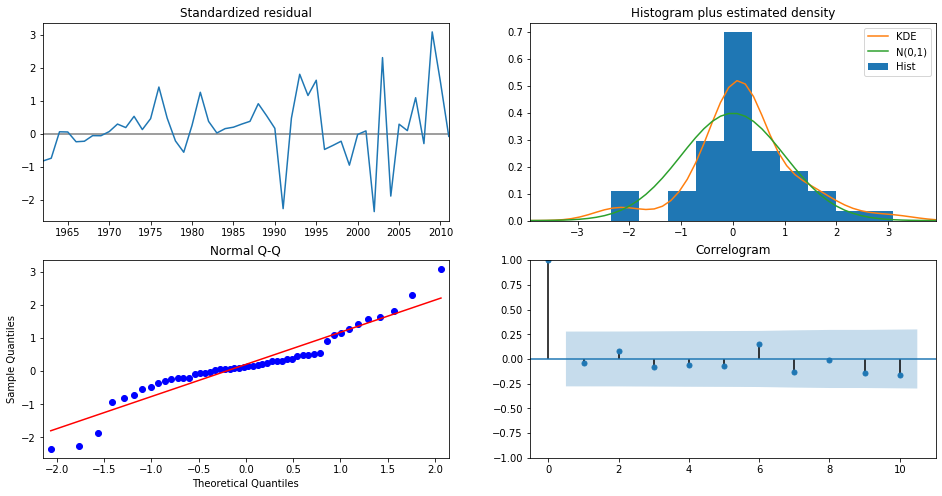

In [138]:
model_ARIMA_livestock.plot_diagnostics(figsize=(16, 8))
plt.show()

In [139]:
prediction_ARIMA_cattle = model_ARIMA_livestock.forecast(steps = 24)
visual_pred_cattle = pd.DataFrame(prediction_ARIMA_cattle)
visual_pred_cattle.rename(columns = {0:'Prediction_cattle'}, inplace = True)

In [140]:
visual_pred_cattle

,Prediction_cattle
2012-01-01,15093.292459
2013-01-01,15270.292230
2014-01-01,15447.229134
2015-01-01,15624.103194
2016-01-01,15800.914432
2017-01-01,15977.662871
2018-01-01,16154.348533
2019-01-01,16330.971440
2020-01-01,16507.531615
2021-01-01,16684.029079


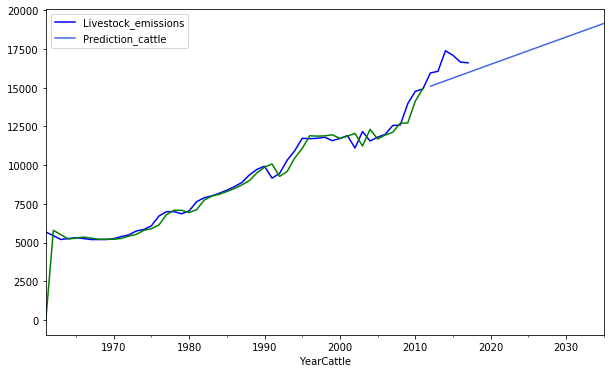

In [141]:
fig, ax = plt.subplots(figsize = (10,6))
cattle.plot(ax=ax, color = 'blue')
model_ARIMA_livestock.fittedvalues.plot(ax=ax, color = 'green')
visual_pred_cattle.plot(ax=ax, color = 'royalblue');

In [142]:
prediction_ARIMA_cattle

2012-01-01    15093.292459
2013-01-01    15270.292230
2014-01-01    15447.229134
2015-01-01    15624.103194
2016-01-01    15800.914432
2017-01-01    15977.662871
2018-01-01    16154.348533
2019-01-01    16330.971440
2020-01-01    16507.531615
2021-01-01    16684.029079
2022-01-01    16860.463855
2023-01-01    17036.835966
2024-01-01    17213.145433
2025-01-01    17389.392279
2026-01-01    17565.576526
2027-01-01    17741.698196
2028-01-01    17917.757312
2029-01-01    18093.753896
2030-01-01    18269.687969
2031-01-01    18445.559555
2032-01-01    18621.368675
2033-01-01    18797.115351
2034-01-01    18972.799607
2035-01-01    19148.421463
Freq: AS-JAN, dtype: float64

In [143]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [144]:
evaluate_forecast(train_cattle, model_ARIMA_livestock.fittedvalues)

,r2_score,mean_absolute_error,mse,rmse
0,0.906929,379.362467,791740.42995,889.797971


In [145]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [146]:
mean_absolute_percentage_error(cattle.Livestock_emissions, model_ARIMA_livestock.fittedvalues)

4.828836530039422

- r2_score = 0.9, los valores de predicción se aproximan bastante a los puntos reales.
- rmse = 889Gg CO2, de error medio entre las emisiones predecidas
- MAPE < 10, pronostico con buena precisión para train

In [147]:
y_pred_test_cattle = model_ARIMA_livestock.predict (n_periods = len (test_cattle), start = test_cattle.index.min(), end = test_cattle.index.max())
y_pred_test_cattle

2012-01-01    15093.292459
2013-01-01    15270.292230
2014-01-01    15447.229134
2015-01-01    15624.103194
2016-01-01    15800.914432
2017-01-01    15977.662871
Freq: AS-JAN, dtype: float64

In [148]:
evaluate_forecast(test_cattle, y_pred_test_cattle)

,r2_score,mean_absolute_error,mse,rmse
0,-4.344811,1088.08478,1.395888e+06,1181.477143


mse_test >> mse_train, r2_score_train = 0.9 r2_score_test = -4.19 == sobreajuste del modelo.

### 5C2 - Autoregressive Integrated Moving Average (ARIMA) - Crops

In [149]:
# train y test de proporcion 90:10 ya que mi dataset es pequeño < 100 datos

In [150]:
train_crops = crops[:int(0.90*(len(crops)))]
test_crops = crops[int(0.90*(len(crops))):]

In [151]:
model_ARIMA1_crops = SARIMAX(train_crops, order = (1, 4, 1)).fit()
model_ARIMA2_crops = SARIMAX(train_crops, order = (2, 4, 2)).fit()
model_ARIMA3_crops = SARIMAX(train_crops, order = (3, 4, 3)).fit()
model_ARIMA4_crops = SARIMAX(train_crops, order = (4, 4, 4)).fit()
model_ARIMA5_crops = SARIMAX(train_crops, order = (5, 4, 5)).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

In [152]:
print("Model_ARIMA1:")
print("AIC: {:.4f}".format(model_ARIMA1_crops.aic))
print("BIC: {:.4f}".format(model_ARIMA1_crops.bic))
print("\nModel_ARIMA2:")
print("AIC: {:.4f}".format(model_ARIMA2_crops.aic))
print("BIC: {:.4f}".format(model_ARIMA2_crops.bic))
print("\nModel_ARIMA3:")
print("AIC: {:.4f}".format(model_ARIMA3_crops.aic))
print("BIC: {:.4f}".format(model_ARIMA3_crops.bic))
print("\nModel_ARIMA4:")
print("AIC: {:.4f}".format(model_ARIMA4_crops.aic))
print("BIC: {:.4f}".format(model_ARIMA4_crops.bic))
print("\nModel_ARIMA5:")
print("AIC: {:.4f}".format(model_ARIMA5_crops.aic))
print("BIC: {:.4f}".format(model_ARIMA5_crops.bic))

Model_ARIMA1:
AIC: 675.8591
BIC: 681.4096

Model_ARIMA2:
AIC: 665.5173
BIC: 674.7681

Model_ARIMA3:
AIC: 641.0432
BIC: 653.9942

Model_ARIMA4:
AIC: 637.8620
BIC: 654.5133

Model_ARIMA5:
AIC: 653.8563
BIC: 674.2080


In [153]:
model_ARIMA_crops = SARIMAX(train_crops, order = (3, 4, 3), enforce_invertibility=False, enforce_stationarity=False).fit()

C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\Paola\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [154]:
model_ARIMA_crops.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:        Crops_emissions   No. Observations:                   51
Model:               SARIMAX(3, 4, 3)   Log Likelihood                -286.287
Date:                Wed, 23 Sep 2020   AIC                            586.574
Time:                        11:55:38   BIC                            598.902
Sample:                    01-01-1961   HQIC                           591.120
                         - 01-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5209      0.187     -8.153      0.000      -1.887      -1.155
ar.L2         -0.8804      0.320     -2.749      0.006      -1.508      -0.253
ar.L3         -0.1631      0.220     -0.742      0.458      -0.594       0.268
ma.L1         -0.9911     10.281     -0.096      0.923     -21.142      19.159
ma.L2         -0.9878      6.556     -0.151      0.880     -13.836      11.861
ma.L3          0.9961      8.330      0.120      0.905     -15.330      17.322
sigma2      2.879e+04   2.38e+05      0.121      0.904   -4.38e+05    4.95e+05
===================================================================================
Ljung-Box (Q):                       26.74   Jarque-Bera (JB):                 8.19
Prob(Q):                              0.95   Prob(JB):                         0.02
Heteroskedasticity (H):               8.90   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

coef < 0.05 en todos los puntos 

In [155]:
model_ARIMA_crops.resid.head()

YearCrops
1961-01-01    153.646491
1962-01-01   -221.171096
1963-01-01     32.093797
1964-01-01    159.901278
1965-01-01   -138.688900
dtype: float64

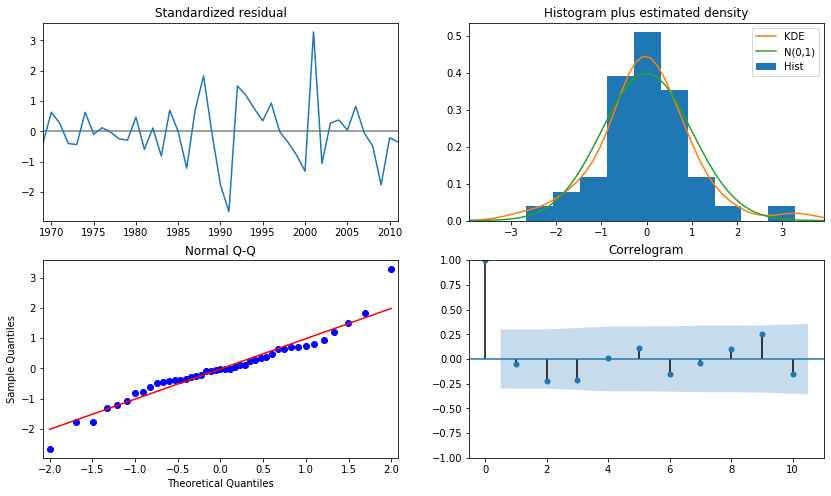

In [156]:
model_ARIMA_crops.plot_diagnostics(figsize = (14, 8))
plt.show()

In [157]:
prediction_ARIMA_crops = model_ARIMA_crops.forecast(steps= 24)

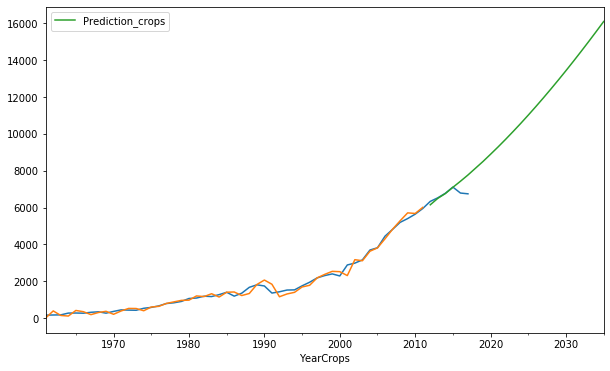

In [158]:
prediction_ARIMA_crops = model_ARIMA_crops.forecast(steps= 24)
prediction_ARIMA_crops
visual_pred_crops = pd.DataFrame(prediction_ARIMA_crops)
visual_pred_crops.rename(columns = {0:'Prediction_crops'}, inplace = True)
fig, ax = plt.subplots(figsize = (10,6))
crops.plot(ax=ax)
model_ARIMA_crops.fittedvalues.plot (ax=ax)
visual_pred_crops.plot(ax=ax)

In [159]:
# el modelo de predicción de train no capta el leve descenso de las emisiones en el año 2016/2017, por lo que la predicción lanza un aumento casi exponencial

In [160]:
prediction_ARIMA_crops

2012-01-01     6147.394832
2013-01-01     6498.626930
2014-01-01     6759.029510
2015-01-01     7097.724223
2016-01-01     7425.935593
2017-01-01     7767.730155
2018-01-01     8136.034323
2019-01-01     8503.433379
2020-01-01     8895.272260
2021-01-01     9293.985645
2022-01-01     9707.401336
2023-01-01    10133.899456
2024-01-01    10570.871680
2025-01-01    11021.389286
2026-01-01    11482.296399
2027-01-01    11955.069066
2028-01-01    12438.694598
2029-01-01    12932.883160
2030-01-01    13437.681151
2031-01-01    13952.393082
2032-01-01    14477.037906
2033-01-01    15011.146284
2034-01-01    15554.483536
2035-01-01    16106.771453
Freq: AS-JAN, dtype: float64

In [161]:
visual_pred_crops = pd.DataFrame(prediction_ARIMA_crops)
visual_pred_crops.rename(columns = {0:'Prediction_crops'}, inplace = True)
visual_pred_crops

,Prediction_crops
2012-01-01,6147.394832
2013-01-01,6498.626930
2014-01-01,6759.029510
2015-01-01,7097.724223
2016-01-01,7425.935593
2017-01-01,7767.730155
2018-01-01,8136.034323
2019-01-01,8503.433379
2020-01-01,8895.272260
2021-01-01,9293.985645


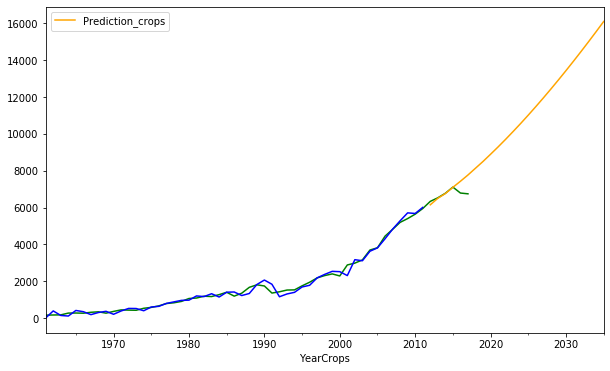

In [162]:
fig, ax = plt.subplots(figsize = (10,6))
crops.plot(ax=ax, color = 'green')
model_ARIMA_crops.fittedvalues.plot (ax=ax, color = 'blue')
visual_pred_crops.plot(ax=ax, color = 'orange')

#### Diagnóstico del modelo

In [163]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [164]:
mean_absolute_percentage_error(crops, prediction_ARIMA_crops)

4.721746955587411

In [165]:
evaluate_forecast(train_crops, model_ARIMA_crops.fittedvalues)

,r2_score,mean_absolute_error,mse,rmse
0,0.987697,128.881064,30298.95199,174.065941


- r2_score = 0.98, el modelo ajusta muy bien los datos de predicción
- rmse = 174, de error medio entre las predicciones
- MAPE < 10 , Buena predicción para los datos de train. 

In [166]:
y_pred_test = model_ARIMA_crops.predict (n_periods = len (test_crops), start = test_crops.index.min(), end = test_crops.index.max())
y_pred_test

2012-01-01    6147.394832
2013-01-01    6498.626930
2014-01-01    6759.029510
2015-01-01    7097.724223
2016-01-01    7425.935593
2017-01-01    7767.730155
Freq: AS-JAN, dtype: float64

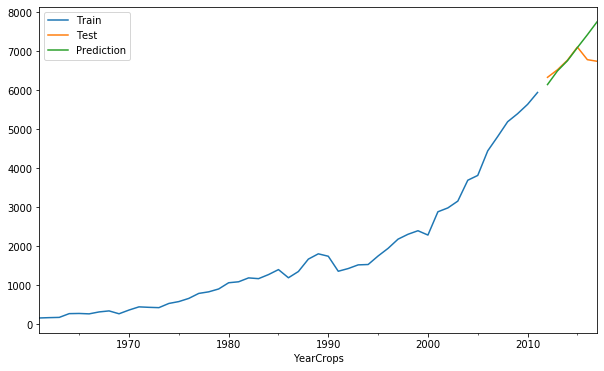

In [167]:
plt.figure(figsize=(16,8))
train_crops.plot(figsize=(10,6), label='Train')
test_crops.plot(figsize=(10,6), label='Test')
y_pred_test.plot(figsize=(10,6), label='Prediction')
plt.legend(loc='best')
plt.show()

In [168]:
evaluate_forecast(test_crops, y_pred_test)

,r2_score,mean_absolute_error,mse,rmse
0,-3.312732,317.061036,248495.860912,498.493592


Al igual que el modelo aplicado a la serie Cattle:
    
mse_test >> mse_train, r2_score_train >> r2_score_test == sobreajuste del modelo.

# 6 - Model with pmdarima

La función auto_arima realiza una búsqueda de la mejor configuración para el modelo ARIMA segun los datos de que disponemos, intentamos con el auto_arima ya que en los modelos de ambas series tenemos un claro sobreajuste.

### 6A - Livestock

In [169]:
import pmdarima as pm

In [170]:
model_pmdarima_livestock = pm.auto_arima(cattle, m = 1, suppress_warnings=True)

In [171]:
model_pmdarima_livestock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   57
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -419.565
Date:                Wed, 23 Sep 2020   AIC                            843.129
Time:                        11:55:41   BIC                            847.180
Sample:                             0   HQIC                           844.699
                                 - 57                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    195.1330     60.523      3.224      0.001      76.510     313.756
sigma2      1.884e+05   3.04e+04      6.202      0.000    1.29e+05    2.48e+05
===================================================================================
Ljung-Box (Q):                       24.40   Jarque-Bera (JB):                 4.56
Prob(Q):                              0.98   Prob(JB):                         0.10
Heteroskedasticity (H):               7.07   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

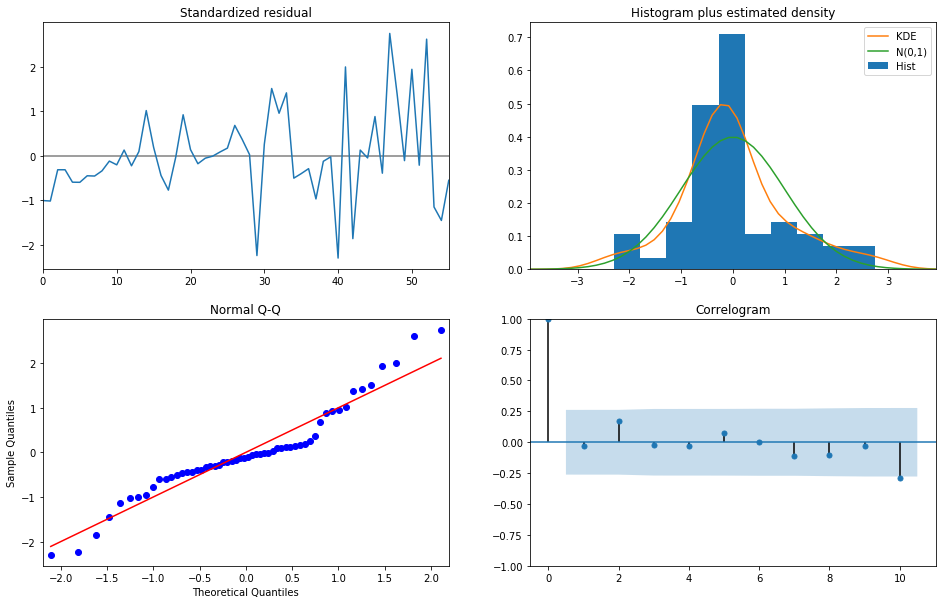

In [172]:
model_pmdarima_livestock.plot_diagnostics(figsize = (16, 10))
plt.show()

In [173]:
forecast_mean_livestock, conf_int = model_pmdarima_livestock.predict(18, return_conf_int = True)
forecast_mean_livestock

array([16804.06531786, 16999.19833571, 17194.33135357, 17389.46437143,
       17584.59738929, 17779.73040714, 17974.863425  , 18169.99644286,
       18365.12946071, 18560.26247857, 18755.39549643, 18950.52851429,
       19145.66153214, 19340.79455   , 19535.92756786, 19731.06058571,
       19926.19360357, 20121.32662143])

In [174]:
conf_int[:5]

array([[15953.23632093, 17654.89431479],
       [15795.944429  , 18202.45224243],
       [15720.65230234, 18668.0104048 ],
       [15687.80637757, 19091.12236529],
       [15682.08591493, 19487.10886365]])

In [175]:
forecast_lower_livestock = conf_int[:, 0]
forecast_upper_livestock = conf_int[:, 1]

In [176]:
date_pmdarima_livestock = pd.period_range(start = cattle.index[-1], periods = 19, freq = "Y")[1:]
date_pmdarima_livestock

PeriodIndex(['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025',
             '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033',
             '2034', '2035'],
            dtype='period[A-DEC]', freq='A-DEC')

In [177]:
forecast_livestock = pd.Series(forecast_mean_livestock, index = date_pmdarima_livestock)
forecast_livestock

2018    16804.065318
2019    16999.198336
2020    17194.331354
2021    17389.464371
2022    17584.597389
2023    17779.730407
2024    17974.863425
2025    18169.996443
2026    18365.129461
2027    18560.262479
2028    18755.395496
2029    18950.528514
2030    19145.661532
2031    19340.794550
2032    19535.927568
2033    19731.060586
2034    19926.193604
2035    20121.326621
Freq: A-DEC, dtype: float64

### 6B - Crops

In [178]:
model_pmdarima_crops = pm.auto_arima(crops, m = 1, suppress_warnings=True)

In [179]:
model_pmdarima_crops.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   57
Model:               SARIMAX(1, 2, 2)   Log Likelihood                -360.353
Date:                Wed, 23 Sep 2020   AIC                            730.705
Time:                        11:55:45   BIC                            740.742
Sample:                             0   HQIC                           734.586
                                 - 57                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.8245      2.264      3.456      0.001       3.387      12.262
ar.L1         -0.7409      0.096     -7.743      0.000      -0.928      -0.553
ma.L1          0.0002     26.147    5.9e-06      1.000     -51.248      51.248
ma.L2         -0.9998      0.140     -7.156      0.000      -1.274      -0.726
sigma2      2.583e+04      0.001   2.54e+07      0.000    2.58e+04    2.58e+04
===================================================================================
Ljung-Box (Q):                       33.50   Jarque-Bera (JB):                15.12
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              20.02   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.39e+25. Standard errors may be unstable.
"""

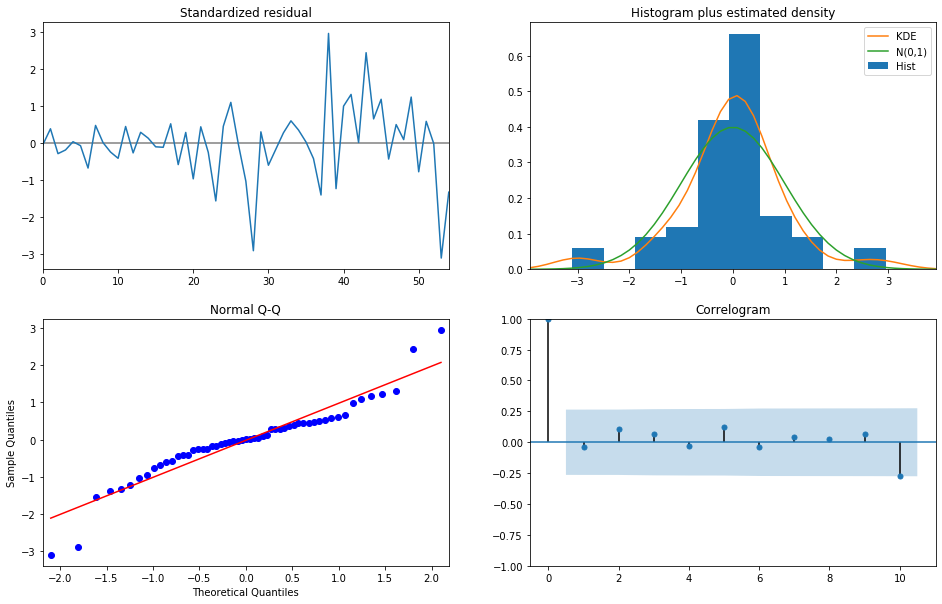

In [180]:
fig = model_pmdarima_crops.plot_diagnostics()
fig.set_size_inches(16, 10)
plt.show();

In [181]:
forecast_mean_crops, conf_int = model_pmdarima_crops.predict(18, return_conf_int = True)

In [182]:
forecast_mean_crops

array([ 6992.16820645,  7242.2882195 ,  7498.31634501,  7757.79188844,
        8022.53789789,  8291.20373665,  8564.79004728,  8842.55548644,
        9125.04929116,  9411.86454969,  9703.30272963,  9999.14048351,
       10299.54328216, 10604.38853365, 10913.76706233, 11227.61157941,
       11545.97193696, 11868.81120121])

In [183]:
conf_int[:5]

array([[6671.83319424, 7312.50321867],
       [6726.87335311, 7757.70308588],
       [6873.6542315 , 8122.97845851],
       [7015.31615059, 8500.26762628],
       [7190.26915406, 8854.80664171]])

In [184]:
forecast_lower_crops = conf_int[:, 0]
forecast_upper_crops = conf_int[:, 1]

In [185]:
data_pmdarima_crops = pd.period_range(start = crops.index[-1], periods = 19, freq = "Y")[1:]
data_pmdarima_crops

PeriodIndex(['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025',
             '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033',
             '2034', '2035'],
            dtype='period[A-DEC]', freq='A-DEC')

In [186]:
forecast_crops = pd.Series(forecast_mean_crops, index = data_pmdarima_crops)
forecast_crops

2018     6992.168206
2019     7242.288219
2020     7498.316345
2021     7757.791888
2022     8022.537898
2023     8291.203737
2024     8564.790047
2025     8842.555486
2026     9125.049291
2027     9411.864550
2028     9703.302730
2029     9999.140484
2030    10299.543282
2031    10604.388534
2032    10913.767062
2033    11227.611579
2034    11545.971937
2035    11868.811201
Freq: A-DEC, dtype: float64

# 7 - Data comparison and visualization

### 7A - Comparison between emissions from crops and livestock 1961 to 2017

In [187]:
visual = pd.concat([cattle, crops], axis = 1).reindex(cattle.index)
visual = visual.reset_index()
visual['Year'] = list(range(1961, 2018))

In [188]:
visual.drop(['YearCattle'], axis = 1, inplace = True)

In [189]:
visual = visual[['Year', 'Livestock_emissions', 'Crops_emissions']]

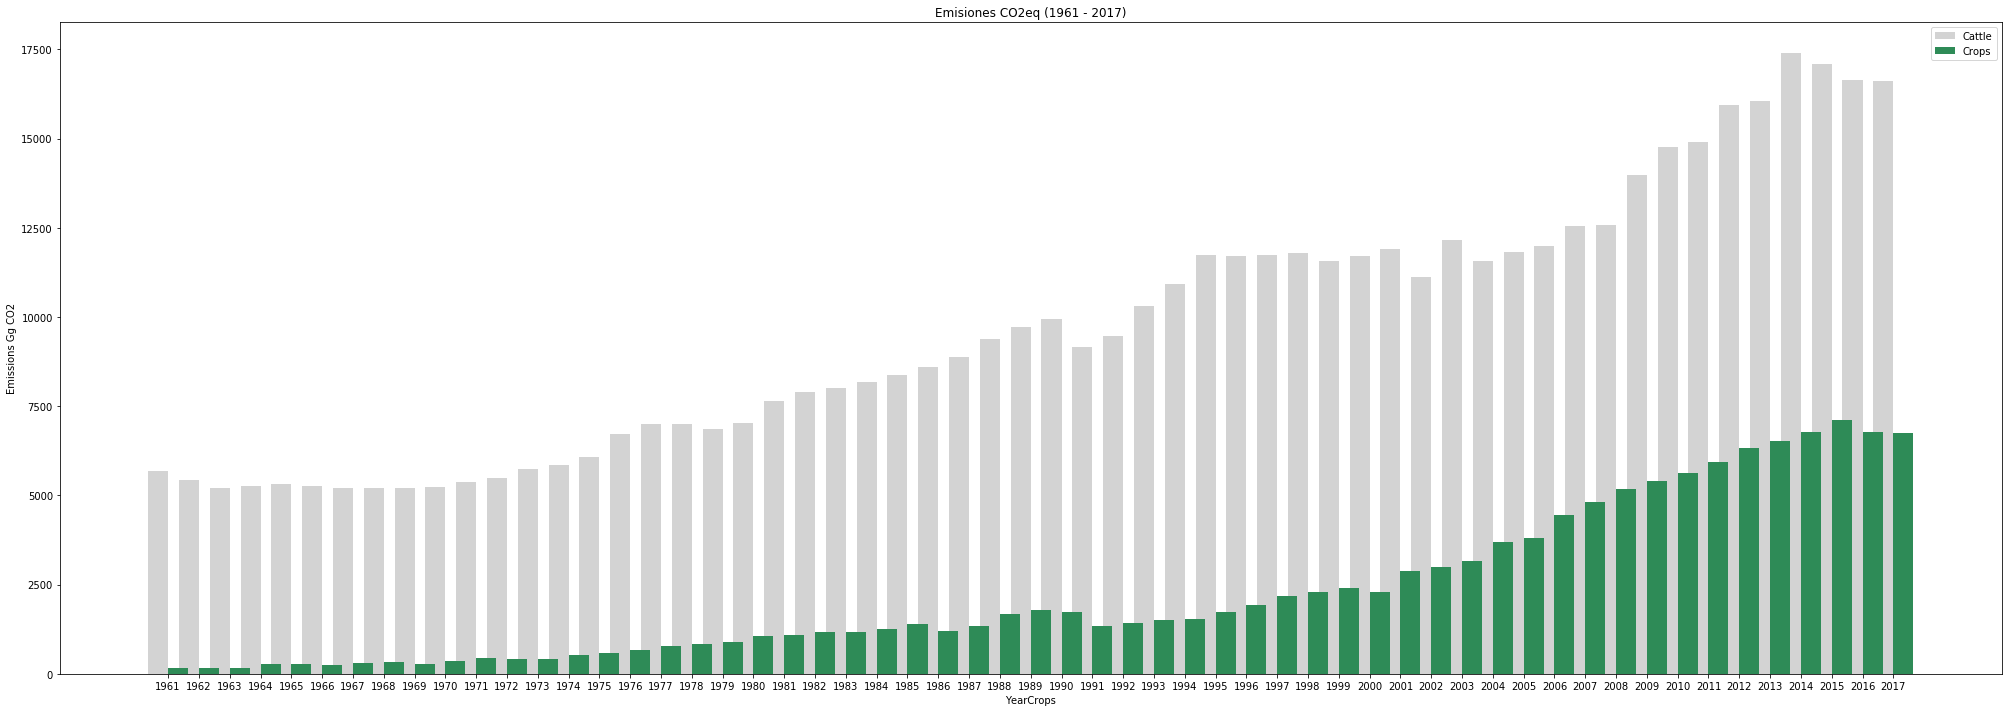

In [190]:
labels = visual.Year
Livestock = visual['Livestock_emissions']
Crops = visual['Crops_emissions']
x = visual.Year
width = 0.65 
fig, ax = plt.subplots(figsize = (28,10))
rects1 = ax.bar(x - width/2, Livestock, width, label='Cattle', color = 'lightgrey')
rects2 = ax.bar(x + width/2, Crops, width, label='Crops', color = 'seagreen')

ax.set_xlabel('YearCrops')
ax.set_ylabel('Emissions Gg CO2')
ax.set_title('Emisiones CO2eq (1961 - 2017)')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()
plt.show()

Paraguay dio cierre al [año 2014](https://revistalogisticaparaguay.com/ganaderia-paraguaya-cierra-el-2014-como-sexto-exportador-mundial-de-carne/), ubicándose como sexto exportador mundial de carne. El aumento de las emisiones para este año se debió al aumento en la producción cárnica.

En el [año 2015](https://www.ultimahora.com/se-establece-nuevo-record-produccion-soja-paraguay-n1048579.html), Paraguay produjo 10.000.000 de toneladas de soja, ubicándose como el cuarto exportador mundial de soja.

Las emisiones de GHG aumentan con el aumento de la producción, las zafras 2014/2015/2016, arrojan los valores más altos de emisión para el periodo de análisis.

In [191]:
format_dict = {'Livestock_emissions':'{:.2f}', 'Crops_emissions':'{:.2f}'}
visual.style.format(format_dict).background_gradient(subset=['Livestock_emissions', 'Crops_emissions'], cmap='BuGn')

,Year,Livestock_emissions,Crops_emissions
0,1961,5681.48,153.65
1,1962,5441.76,162.30
2,1963,5197.49,168.50
3,1964,5257.32,265.13
4,1965,5317.14,269.51
5,1966,5256.10,259.25
6,1967,5193.83,308.96
7,1968,5195.05,335.23
8,1969,5193.83,261.49
9,1970,5242.67,357.18


Recordemos que las emisiones de la variable 'Livestock' provienen únicamente de la producción de ganado bovino, así tambien, la variable 'Crops', recoge a 4 tipos de cultivos distintos.

Las zafras de mayor producción tanto para Livestock como para Crops, son las correspondientes a los años 2014/2015, por ello las emisiones en estos años se resaltan más.

### 7B - Forecast visualization

In [192]:
forecast_livestock

2018    16804.065318
2019    16999.198336
2020    17194.331354
2021    17389.464371
2022    17584.597389
2023    17779.730407
2024    17974.863425
2025    18169.996443
2026    18365.129461
2027    18560.262479
2028    18755.395496
2029    18950.528514
2030    19145.661532
2031    19340.794550
2032    19535.927568
2033    19731.060586
2034    19926.193604
2035    20121.326621
Freq: A-DEC, dtype: float64

In [193]:
forecast_crops

2018     6992.168206
2019     7242.288219
2020     7498.316345
2021     7757.791888
2022     8022.537898
2023     8291.203737
2024     8564.790047
2025     8842.555486
2026     9125.049291
2027     9411.864550
2028     9703.302730
2029     9999.140484
2030    10299.543282
2031    10604.388534
2032    10913.767062
2033    11227.611579
2034    11545.971937
2035    11868.811201
Freq: A-DEC, dtype: float64

In [194]:
visual_predictions = pd.concat([forecast_livestock, forecast_crops], axis = 1)
visual_predictions.rename(columns= {0 : 'Prediction_cattle', 1 : 'Prediction_crops'}, inplace = True)
visual_predictions

,Prediction_cattle,Prediction_crops
2018,16804.065318,6992.168206
2019,16999.198336,7242.288219
2020,17194.331354,7498.316345
2021,17389.464371,7757.791888
2022,17584.597389,8022.537898
2023,17779.730407,8291.203737
2024,17974.863425,8564.790047
2025,18169.996443,8842.555486
2026,18365.129461,9125.049291
2027,18560.262479,9411.864550


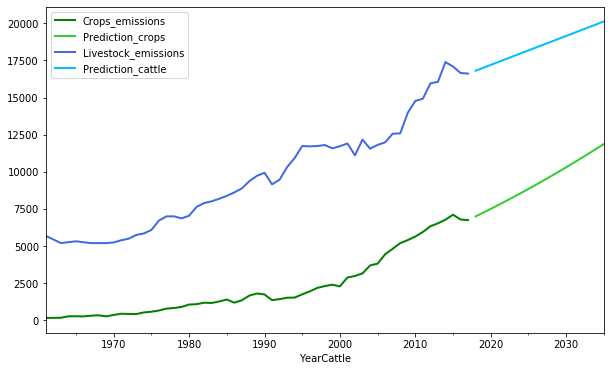

In [195]:
fig, ax = plt.subplots(figsize = (10,6))

crops.plot (ax=ax, color = 'green', linewidth = 2)
visual_predictions['Prediction_crops'].plot(ax=ax, color = 'limegreen', linewidth = 2)

cattle.plot(ax=ax,color = 'royalblue', linewidth = 2)
visual_predictions['Prediction_cattle'].plot(ax=ax, color = 'deepskyblue', linewidth = 2)
plt.legend()
plt.show();

In [196]:
visual_predictions.reset_index()

,index,Prediction_cattle,Prediction_crops
0,2018,16804.065318,6992.168206
1,2019,16999.198336,7242.288219
2,2020,17194.331354,7498.316345
3,2021,17389.464371,7757.791888
4,2022,17584.597389,8022.537898
5,2023,17779.730407,8291.203737
6,2024,17974.863425,8564.790047
7,2025,18169.996443,8842.555486
8,2026,18365.129461,9125.049291
9,2027,18560.262479,9411.864550


In [197]:
format_dict = {'Prediction_cattle':'{:.2f}', 'Prediction_crops':'{:.2f}'}
visual_predictions.style.format(format_dict).background_gradient(subset=['Prediction_cattle', 'Prediction_crops'], cmap='BuGn')

,Prediction_cattle,Prediction_crops
2018,16804.07,6992.17
2019,16999.20,7242.29
2020,17194.33,7498.32
2021,17389.46,7757.79
2022,17584.60,8022.54
2023,17779.73,8291.20
2024,17974.86,8564.79
2025,18170.00,8842.56
2026,18365.13,9125.05
2027,18560.26,9411.86
